# Retail Sales Analysis: Python EDA
**Objective:**
This project analyzes retail sales data using Python to uncover actionable insights on sales trends, profitability, and customer behavior. It demonstrates how data analytics transforms raw sales data into business intelligence, helping retailers make informed, data-driven decisions.


### Notebook Sections:
    1. Setup & Imports
    2. Load the CSV and Quick Validation
    3. Data Cleaning & Feature Engineering
       3.1. Handle datetime, Extra Space and Missing Values
       3.2. Standardize Column Names & Handle Numeric Columns
       3.3. Handle NaT Values for TimeSeries columns
       3.4. Quick Data QA Checks (duplicates, negative sales)
       3.5. Feature Engineering
       3.6. Outlier Detection & Sanity Checks
       3.7. Correlation Matrix & Heatmap
       3.8. Feature Sanity Check
       3.9. Categorical Columns Sanity Check
       3.10. Final Shape & Save
    4. Exploratory Data Analysis (EDA)
       4.1. Univariate Analysis
       4.2. Bivariate Analysis
       4.3. Multivariate Analysis
       4.4. Trend Analysis (Time-Series)
       4.5. Cohort / Customer Trend Analysis
       4.6. RFM Analysis (Customer Segmentation)
       4.7. Pareto Analysis (80/20 Rule)
       4.8. Profitability by Product Sub-Category
       4.9. Regional Sales Map      
    5. Statistical Tests
       5.1. Normality Test (Shapiro–Wilk Test)
	   5.2. Correlation Test (Numeric Relationships)
	   5.3. Kruskal-Wallis Test (Profit by Category, Segment, Region)
	   5.4. Chi-Square Test (Categorical Association)
	   5.5. Mann–Whitney U Test (Binary Group Comparison)
    6. Key Insights & Recommendations
    7. Conclusions
    
## 1. Setup & Imports

In [1]:
# === Imports and Settings ===
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
import plotly.graph_objects as go
from datetime import timedelta
from scipy.stats import shapiro
from scipy.stats import spearmanr, pearsonr
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

# Notebook display settings
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 50)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Paths
ROOT = Path.cwd()
DATA_DIR = ROOT / "../data"
VISUALS_DIR = ROOT / "../visuals"

for d in (DATA_DIR, VISUALS_DIR):
    d.mkdir(parents=True, exist_ok=True)

## 2. Load the CSV and Quick Validation

In [2]:
# === load data ===
file = DATA_DIR / "global_superstore.csv"
df = pd.read_csv(file, encoding='latin1', sep=',', low_memory=False)
df.shape, df.columns.tolist()

((51290, 24),
 ['Row ID',
  'Order ID',
  'Order Date',
  'Ship Date',
  'Ship Mode',
  'Customer ID',
  'Customer Name',
  'Segment',
  'City',
  'State',
  'Country',
  'Postal Code',
  'Market',
  'Region',
  'Product ID',
  'Category',
  'Sub-Category',
  'Product Name',
  'Sales',
  'Quantity',
  'Discount',
  'Profit',
  'Shipping Cost',
  'Order Priority'])

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [4]:
# Info and summary
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,51290.0,NaN,NaN,NaN,25645.5,14806.29199,1.0,12823.25,25645.5,38467.75,51290.0
Order ID,51290,25035,CA-2014-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,51290,1430,18-06-2014,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,51290,1464,22-11-2014,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,51290,4,Standard Class,30775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,51290,1590,PO-18850,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,51290,795,Muhammed Yedwab,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,51290,3,Consumer,26518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,51290,3636,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,51290,1094,California,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Key Takeaways:
1. **Rows & columns:** 51,290 rows × 24 columns → a solid dataset for EDA.
2. **Missing values:**
    - ***Postal Code*** is missing in most rows (only 9,994 present). Not critical for analysis; we can ignore or keep as-is.
    - All other columns are complete — good.

3. **Data types:**
    - ***Order Date*** and ***Ship Date*** are object → need to convert to datetime.
    - ***Sales***, ***Profit***, ***Discount***, ***Shipping Cost*** are already numeric (float64).
    - ***Quantity*** is integer.
    - Categorical columns: ***Region***, ***Category***, ***Segment***, ***Order Priority***, etc.

4. **Range checks:**
    - ***Discount*** goes up to `0.85 (85%)` → watch high discounts for profit impact.
    - ***Profit*** ranges from `-6599.98` to `8399.98` → large outliers exist.
    - ***Shipping Cost*** up to `933.57` → likely corresponds to “Same Day / Critical” orders.
    - ***Quantity*** max `14`, mostly small numbers.
---

## 3. Data Cleaning & Feature Engineering

### 3.1. Handle datetime, Extra Space and Missing Values

In [5]:
# Convert date columns
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True, errors="coerce")

# Strip extra spaces in categorical text columns
str_cols = df.select_dtypes(include="object").columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

# Check missing values
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

**Note :** `Postal Code` has many missing — we’ll ignore it in most analyses.

### 3.2. Standardize Column Names & Handle Numeric Columns

In [6]:
# === Standardize column names (optional, easier references) ===
df.columns = [c.strip().replace(' ', '_').replace('.', '').replace('-','_').lower() for c in df.columns]
df.rename(columns={'order date':'order_date','ship date':'ship_date'}, inplace=True)  # in case
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [7]:
# Fix numeric columns that may be strings (sales, profit, discount, shipping_cost)
numeric_candidates = ['sales','profit','discount','shipping_cost','quantity']
for c in numeric_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

### 3.3. Handle NaT Values for TimeSeries columns

In [8]:
# Count how many NaT values
count_nat_orderdt = df["order_date"].isna().sum()
print("Number of NaT values in :", count_nat_orderdt)

count_nat_shipdt = df["ship_date"].isna().sum()
print("Number of NaT values in ship_date:", count_nat_shipdt)

Number of NaT values in : 0
Number of NaT values in ship_date: 0


**Interpretation :** If many `order_date` or `ship_date` became `NaT`, inspect sample rows to fix parsing issues; often `dayfirst=True` solves it.

### 3.4. Quick Data QA Checks (duplicates, negative sales)

In [9]:
# === Duplicates and sanity checks ===
print("Duplicate Order IDs (multiple rows per order allowed!)", df['order_id'].duplicated().sum())
print("Negative Sales count:", (df['sales'] < 0).sum())
print("Negative Profit count:", (df['profit'] < 0).sum())
print("Discount outside [0,1]:", df.loc[~df['discount'].between(0,1), ['discount']].shape[0])

Duplicate Order IDs (multiple rows per order allowed!) 26255
Negative Sales count: 0
Negative Profit count: 12544
Discount outside [0,1]: 0


**Interpretation :** 
- Negative profit is legitimate (loss-making orders).
- Discount outside [0,1] indicates bad values — inspect and clean if present.

In [10]:
# Instead of only counting duplicates, we can inspect a sample to show it’s multi-line orders, not dirty data:
df[df['order_id'] == df['order_id'].value_counts().index[0]]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
1273,37396,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Sta...,2888.127,11,0.1,609.7157,177.06,Medium
1303,37398,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,FUR-CH-10001215,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,2254.410,5,0.1,375.7350,175.20,Medium
6388,37397,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,TEC-PH-10002885,Technology,Phones,Apple iPhone 5,1299.660,2,0.0,350.9082,53.23,Medium
11080,37387,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.646,3,0.1,18.1764,29.25,Medium
17550,37388,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,TEC-AC-10002647,Technology,Accessories,Logitech Wireless Boombox Speaker - portable -...,212.800,2,0.0,95.7600,15.57,Medium
24942,37399,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,104.850,3,0.0,28.3095,8.25,Medium
25669,37393,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.991,1,0.1,8.0991,7.78,Medium
35563,37400,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,TEC-AC-10001998,Technology,Accessories,Logitech LS21 Speaker System - PC Multimedia -...,59.970,3,0.0,20.3898,3.42,Medium
39006,37390,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.640,2,0.0,21.7920,2.48,Medium
41571,37391,CA-2014-100111,2014-09-21,2014-09-27,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,10035.0,US,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",45.400,4,0.0,12.7120,1.91,Medium


**Duplicates:** 
- `order_id`: `26,255` duplicate Order IDs.
- Many orders have multiple products (***so duplicates are valid***)
- Instead, check for ***row-level duplicates*** (exact same row repeated)

In [11]:
# Duplicate Handling
print("Exact duplicate rows:", df.duplicated().sum())

Exact duplicate rows: 0


### 3.5. Feature Engineering

In [12]:
# === New Features ===
# profit_margin (Profit / Sales), year, month, month_year, delivery_days

# Profit margin (% of sales)
df['profit_margin'] = np.where(df['sales'] > 0, df['profit'] / df['sales'], 0) 
# When creating profit_margin, we should guard against division by zero (This avoids inf/-inf if somehow sales=0.)

# Year, Month, Month-Year for time series
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%b')
df['month_year'] = df['order_date'].dt.to_period('M').astype(str)

# Delivery time in days
df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days

In [13]:
# === Missing Values Overview ===
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

postal_code    41296
dtype: int64

### 3.6. Outlier Detection & Sanity Checks

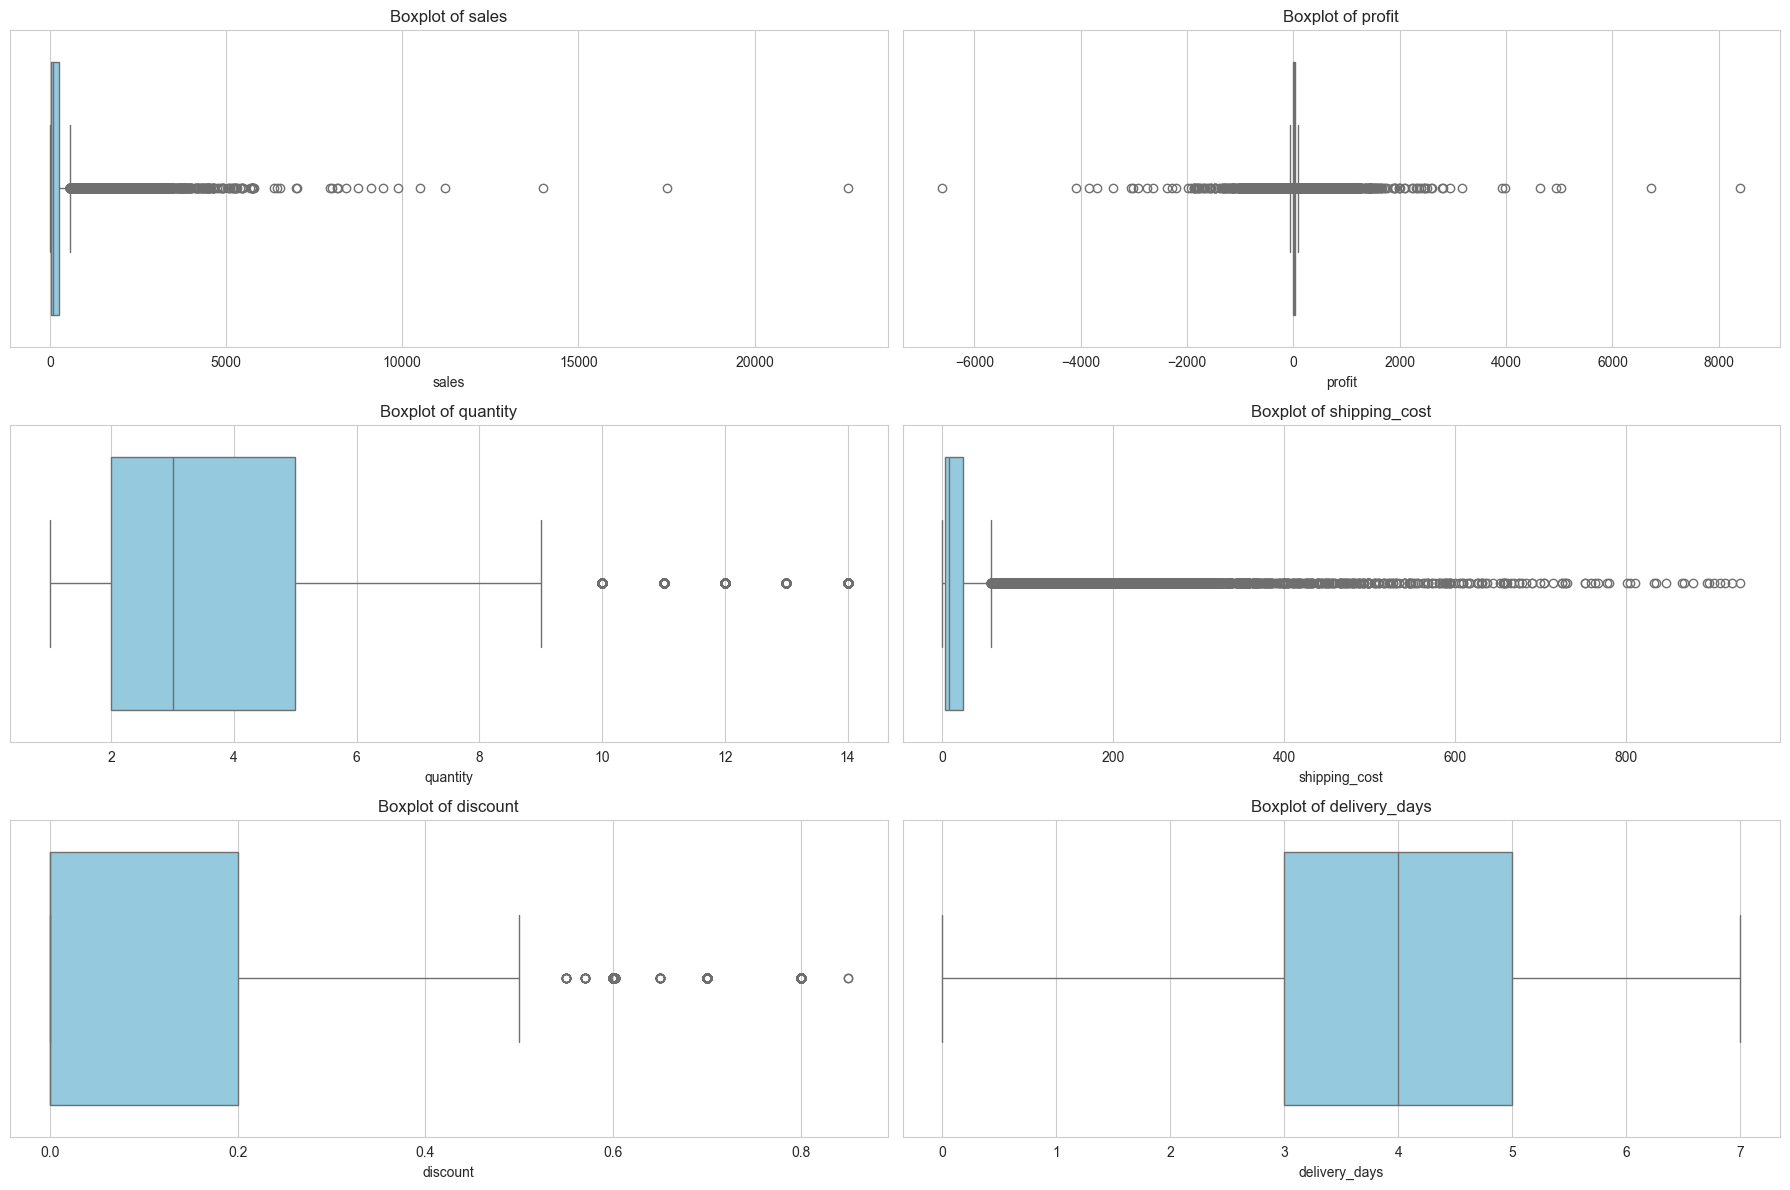


SALES summary:
 count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
1%           3.690000
5%           8.800000
50%         85.053000
95%       1015.955640
99%       2301.000000
max      22638.480000
Name: sales, dtype: float64

PROFIT summary:
 count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
1%        -351.505650
5%         -83.904750
50%          9.240000
95%        211.500000
99%        587.359950
max       8399.976000
Name: profit, dtype: float64

QUANTITY summary:
 count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
1%           1.000000
5%           1.000000
50%          3.000000
95%          8.000000
99%         11.000000
max         14.000000
Name: quantity, dtype: float64

SHIPPING_COST summary:
 count    51290.000000
mean        26.375915
std         57.296804
min          0.000000
1%           0.200000
5%           0.610000
50%          7.790000
95%        111.409

In [14]:
# Pick key numeric columns for outlier checks
num_cols = ['sales', 'profit', 'quantity', 'shipping_cost', 'discount', 'delivery_days']

plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# === Statistical summary (95th, 99th percentiles) ===
for col in ['sales','profit','quantity','shipping_cost']:
    desc = df[col].describe(percentiles=[.01,.05,.95,.99])
    print(f"\n{col.upper()} summary:\n", desc)

# Special sanity checks
print("\nDiscount outside [0,1]:", df.loc[~df['discount'].between(0,1)].shape[0])
print("Negative Delivery Days count:", (df['delivery_days'] < 0).sum())

#### Interpretation of Outlier Analysis

1. **Sales**
- `Median` order ≈ `₹85` (tiny orders dominate).
- `95%` of sales ≤ `₹1,016`, `99%` ≤ `₹2,301`.
- `Max` is `₹22,638` → very rare but not impossible for bulk/corporate orders.
   * It is almost ***10x higher than the 99th percentile*** → clear sign of **extreme outliers**.
> Suggestion: For visualization / modeling, ***cap at 99th percentile*** (≈ `₹2,300`). For descriptive analytics, keep as is.

2. **Profit**
- `Median` profit = `₹9.24` (most orders yield small profit).
- `5%` ≤ `–₹84`, `1%` ≤ `–₹351` → many loss-making orders.
- `95%` ≤ `₹211`, `99%` ≤ `₹587`.
- Extreme outliers: 
    * `min`: `–₹6,599` (extreme negative outliers (massive losses on some transactions))
    * `max`: `₹8,400` (about 14x the 99th percentile)
> Suggestion: Keep negatives (valid losses), but cap extreme ± values at 99th percentile.

3. **Quantity**
	- `50%` of orders = 3 items or fewer.
	- `95%` ≤ 8 units, `99%` ≤ 11 units, `max` = 14 units.
> This is very reasonable, no trimming needed.

4. **Shipping Cost**
	- `Median` shipping = `₹7.79`, most orders are cheap to ship.
	- `95%` ≤ `₹111`, `99%` ≤ `₹287`.
	- `Max` = `₹934` → extreme but plausible for heavy freight / long distances.
> Suggestion: Cap at 99th percentile for modeling.

5. **Discount**
	- All values between `0–1`, no issues.


6. **Delivery Days**
	- No negatives, reasonable distribution expected.

---

#### 3.6.1. Outlier Treatment
In professional analytics, the best practice is to keep two versions:
1. Raw dataset (`df`) → for descriptive insights & business context.
2. Trimmed dataset (`df_clean`) → for modeling & avoiding extreme outlier influence.

In [15]:
'''
What This Does
	1. Uses 1st percentile as lower bound and 99th percentile as upper bound.
	2. Any values below/above are replaced with boundary values (keeps data size same).
	3. Prints the caps so you know exactly what thresholds were used.
'''

# Make a copy for modeling
df_clean = df.copy()

# Define numeric columns to cap
num_cols = ["sales", "profit", "shipping_cost"]

for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df_clean[col] = np.clip(df[col], lower, upper)
    print(f"{col}: capped between {lower:.2f} and {upper:.2f}")
    
# Check new distributions
df_clean[num_cols].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99])

sales: capped between 3.69 and 2301.00
profit: capped between -351.51 and 587.36
shipping_cost: capped between 0.20 and 286.75


,sales,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000
mean,235.416044,28.129258,24.928767
std,389.320768,109.806424,46.067134
min,3.690000,-351.505650,0.200000
1%,3.690000,-351.416071,0.200000
5%,8.800000,-83.904750,0.610000
50%,85.053000,9.240000,7.790000
95%,1015.955640,211.500000,111.409500
99%,2301.000000,587.208695,286.741573
max,2301.000000,587.359950,286.754300


#### 3.6.2. Plotting

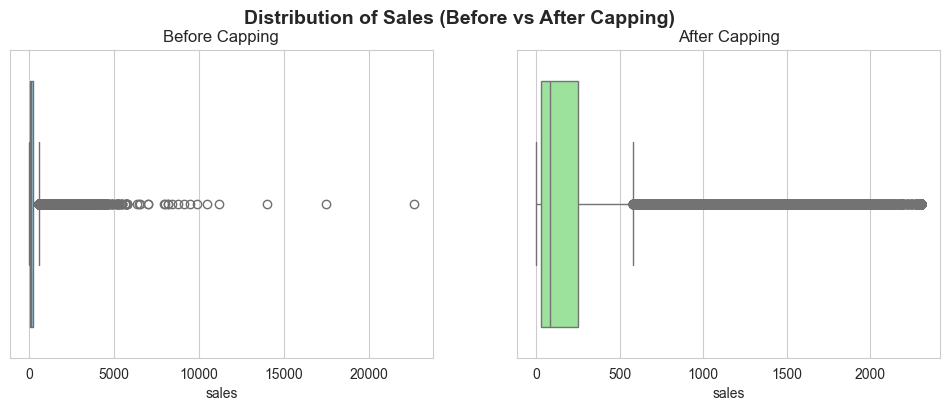

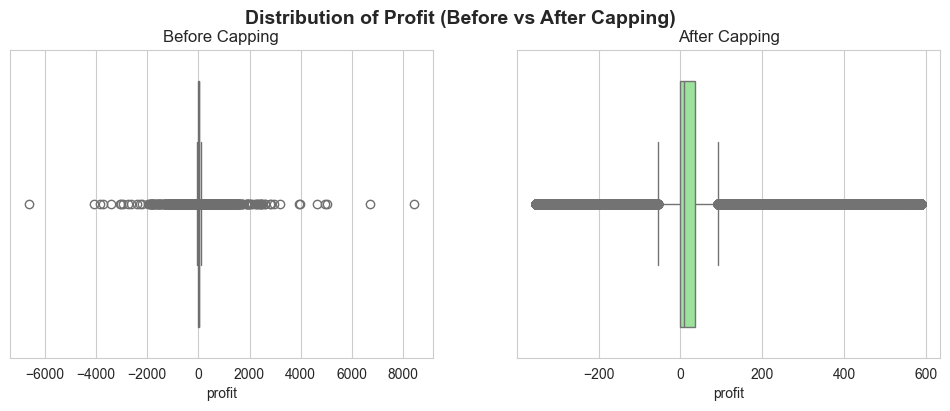

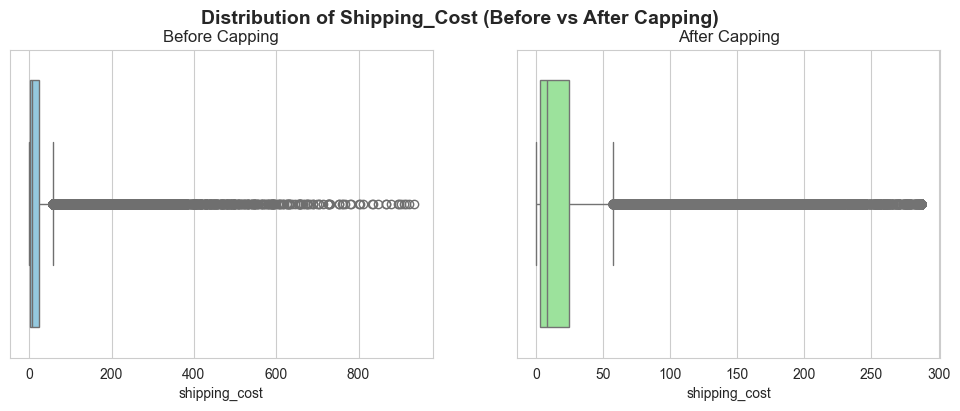

In [16]:
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["sales", "profit", "shipping_cost"]

# Folder to save plots
save_dir = "../visuals/data_cleaning"
os.makedirs(save_dir, exist_ok=True)

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Distribution of {col.title()} (Before vs After Capping)", fontsize=14, fontweight="bold")

    # Original
    sns.boxplot(x=df[col], ax=axes[0], color="skyblue")
    axes[0].set_title("Before Capping")

    # After capping
    sns.boxplot(x=df_clean[col], ax=axes[1], color="lightgreen")
    axes[1].set_title("After Capping")

    # Save plot
    file_path = os.path.join(save_dir, f"{col}_boxplot.png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")

    plt.show()

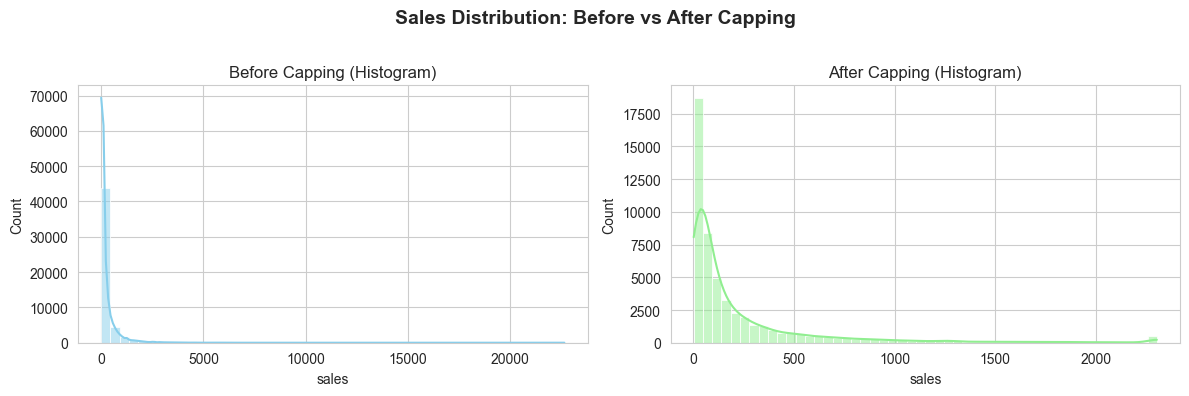

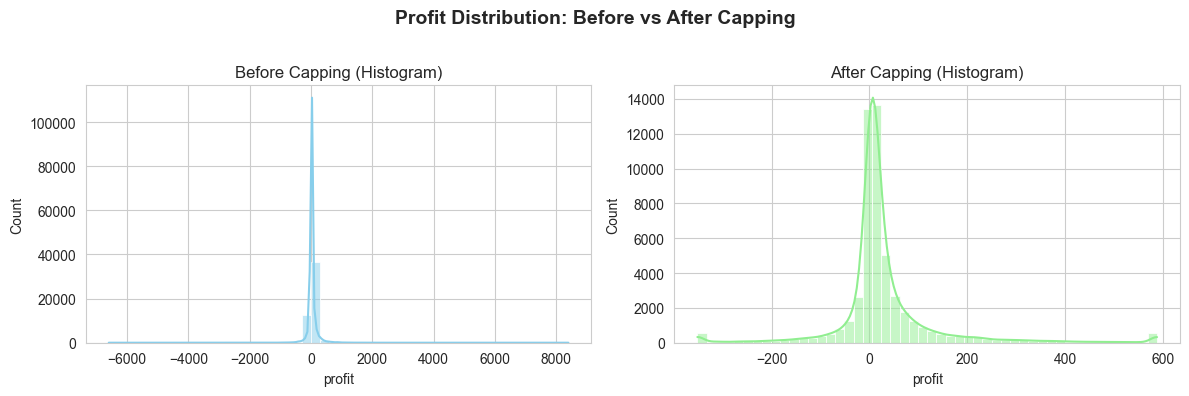

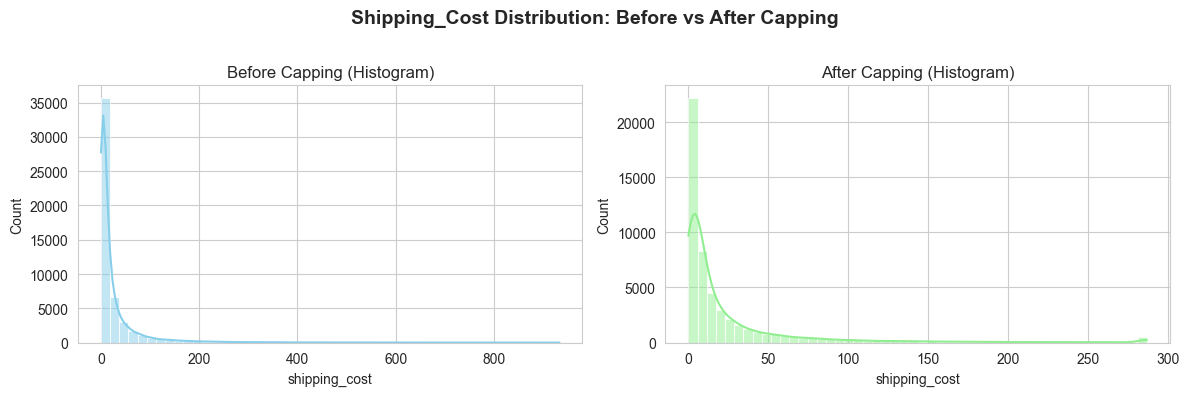

In [17]:
# Histograms
num_cols = ["sales", "profit", "shipping_cost"]

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"{col.title()} Distribution: Before vs After Capping", fontsize=14, fontweight="bold")
    
    sns.histplot(df[col], bins=50, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title("Before Capping (Histogram)")
    sns.histplot(df_clean[col], bins=50, kde=True, ax=axes[1], color="lightgreen")
    axes[1].set_title("After Capping (Histogram)")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save plot
    file_path = os.path.join(save_dir, f"{col}_histogram.png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")

    plt.show()

**VISUALS :**
- ***Left panel:*** original distribution → very stretched due to extreme outliers.
- ***Right panel:*** capped distribution → compressed whiskers, easier to model.

**INTERPRETATION :**
- Outliers in `sales`, `profit`, `shipping cost` heavily skewed the data.
- **After capping**, distributions became more representative of typical orders.
- This ensures **robust models** and **clearer visualizations** without deleting valid data.

### 3.7. Correlation Matrix & Heatmap

Correlation Matrix:
                   sales    profit  quantity  discount  shipping_cost
sales          1.000000  0.539460  0.344295 -0.101266       0.852184
profit         0.539460  1.000000  0.156061 -0.410347       0.465723
quantity       0.344295  0.156061  1.000000 -0.019875       0.295926
discount      -0.101266 -0.410347 -0.019875  1.000000      -0.089145
shipping_cost  0.852184  0.465723  0.295926 -0.089145       1.000000


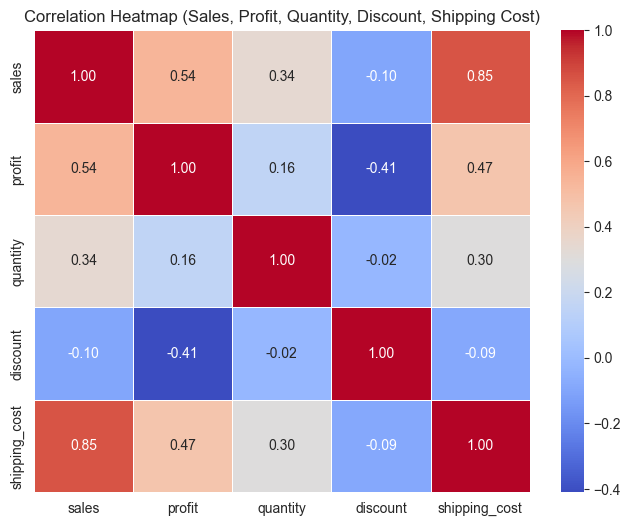

In [18]:
# Select numeric features of interest
num_cols = ["sales", "profit", "quantity", "discount", "shipping_cost"]

# Correlation matrix
corr = df_clean[num_cols].corr()

# Print correlation values
print("Correlation Matrix:\n", corr)

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Sales, Profit, Quantity, Discount, Shipping Cost)")
plt.show()

#### Correlation Matrix Insights
- `Sales` ↔ `Shipping Cost` (0.85) → **Very strong correlation**. Makes sense: larger orders cost more to ship.
- `Sales` ↔ `Profit` (0.54) → **Moderate positive correlation**. Usually higher sales = more profit, though discounts weaken this.
- `Profit` ↔ `Discount` (-0.41) → **Strong negative relationship** → higher discounts slash profits.
- `Quantity` ↔ `Sales` (0.34) → **Weak–moderate correlation**. Larger quantities usually mean more sales, but not always (cheap items sold in bulk).
- **Overall** → **No weird/inconsistent relationships**.

### 3.8. Feature Sanity Check

In [19]:
# Delivery Days Sanity Check [Feature Sanity Check]

# Delivery Days already created
print("Delivery Days Summary:\n", df_clean["delivery_days"].describe())

# Check negative or absurd values
neg_days = df_clean[df_clean["delivery_days"] < 0]
if len(neg_days) > 0:
    print(f"Found {len(neg_days)} rows with negative delivery days.")
else:
    print("No negative delivery days found.")

# Check unusually large delivery times
long_days = df_clean[df_clean["delivery_days"] > 60]   # arbitrary threshold (2 months)
print(f"Orders with unusually long delivery days (>60): {len(long_days)}")

Delivery Days Summary:
 count    51290.000000
mean         3.969370
std          1.729437
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: delivery_days, dtype: float64
No negative delivery days found.
Orders with unusually long delivery days (>60): 0


#### Delivery Days Check
- `Range`: `0–7 days`
- `Mean`: `~4 days` → looks realistic
- No negatives, no absurd long waits (>60 days)

### 3.9. Categorical Columns Sanity Check

In [20]:
# Categorical Columns Sanity Check

# Check unique values for key categorical columns
cat_cols = ["segment", "category", "sub_category", "region", "ship_mode"]

for col in cat_cols:
    print(f"\n{col.upper()} unique values:")
    print(df_clean[col].value_counts(dropna=False))

# Clean formatting (if needed)
for col in cat_cols:
    df_clean[col] = df_clean[col].str.strip().str.title()


SEGMENT unique values:
segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

CATEGORY unique values:
category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

SUB_CATEGORY unique values:
sub_category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

REGION unique values:
region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada            

#### Category Sanity Checks:
- `Segment`: Only 3 clean values (Consumer, Corporate, Home Office).
- `Category`: 3 values (Office Supplies, Technology, Furniture).
- `Sub-Category`: 17 unique, all look valid (Binders, Phones, Tables, etc).
- `Region`: Diverse set (North, West, EMEA, Oceania, etc) — all make sense.
- `Ship Mode`: 4 valid modes (Standard, Second, First, Same Day).
> No typos, no extra spaces (since its already cleaned with .str.strip().str.title())

### 3.10. Final Shape & Save

In [21]:
# Save both versions (df and df_clean) to CSV → keeps pipeline reproducible.
print("\nOriginal Cleaned Shape (df):", df.shape)
print("Capped Shape (df_clean):", df_clean.shape)

# Save cleaned versions → ensures reproducibility
df.to_csv("../data/global_superstore_clean.csv", index=False)
df_clean.to_csv("../data/global_superstore_capped.csv", index=False)

print("\nFiles saved:")
print(" - Global_Superstore_clean.csv (basic cleaned version)")
print(" - Global_Superstore_capped.csv (capped for modeling)")


Original Cleaned Shape (df): (51290, 30)
Capped Shape (df_clean): (51290, 30)

Files saved:
 - Global_Superstore_clean.csv (basic cleaned version)
 - Global_Superstore_capped.csv (capped for modeling)


---
## 4. Exploratory Data Analysis (EDA)
### 4.1. Univariate Analysis
#### 4.1.1. Numerical Variables

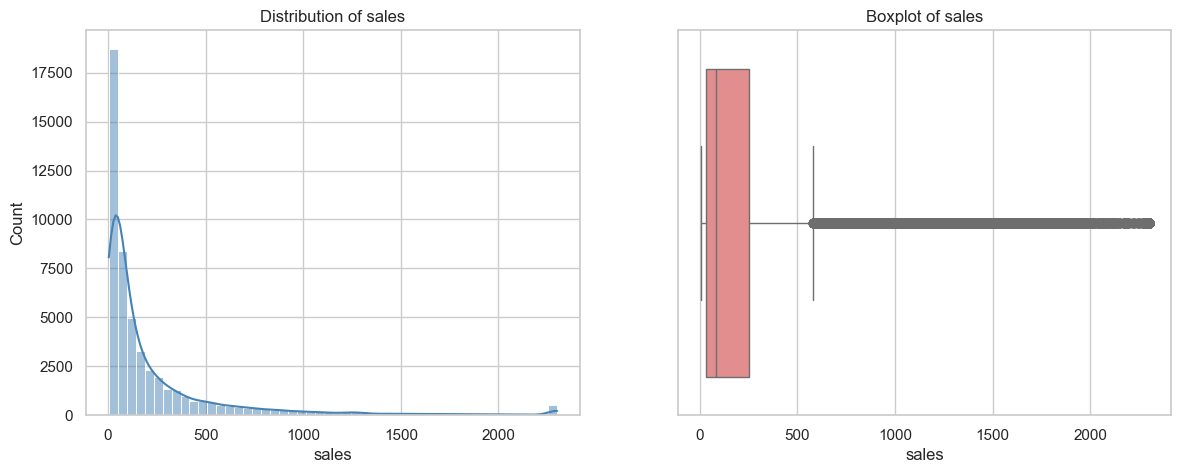

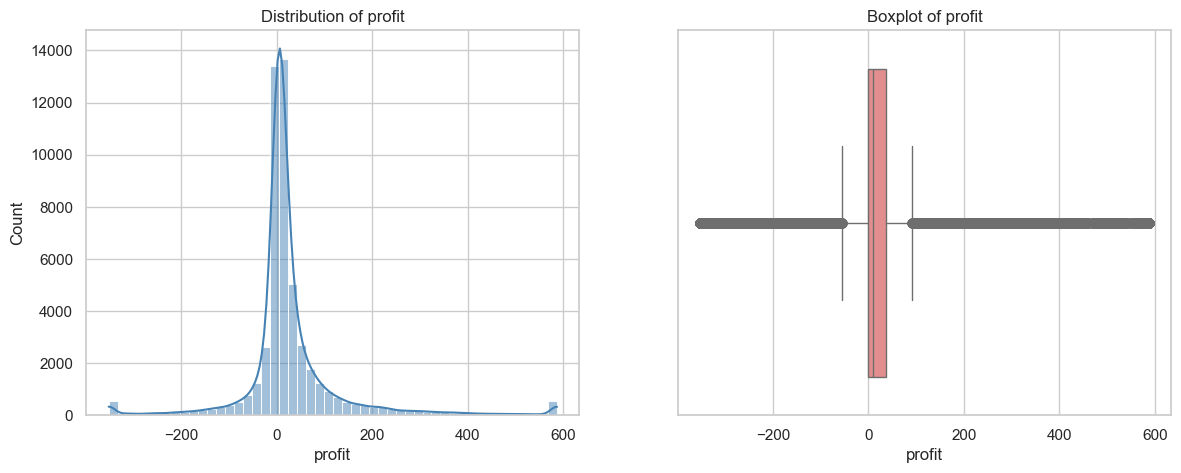

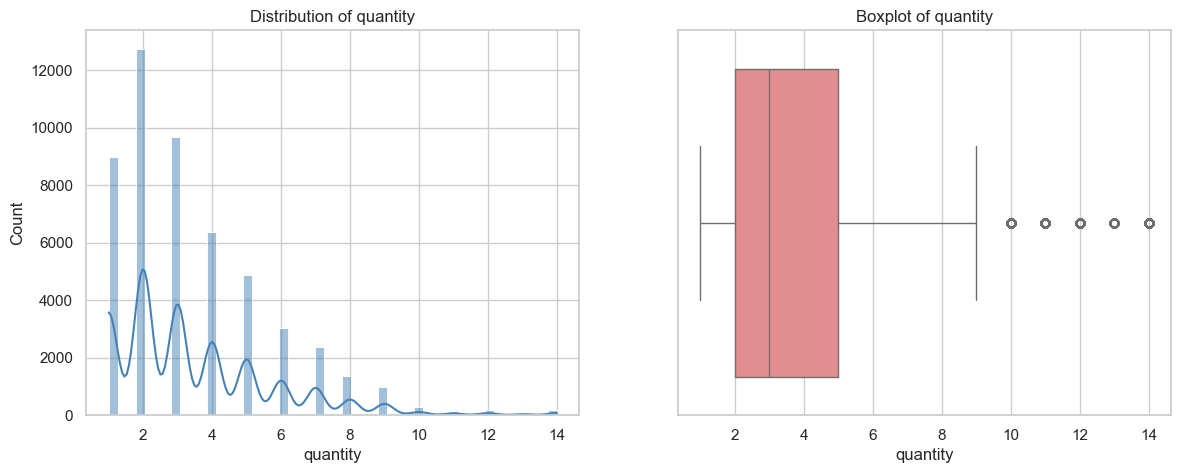

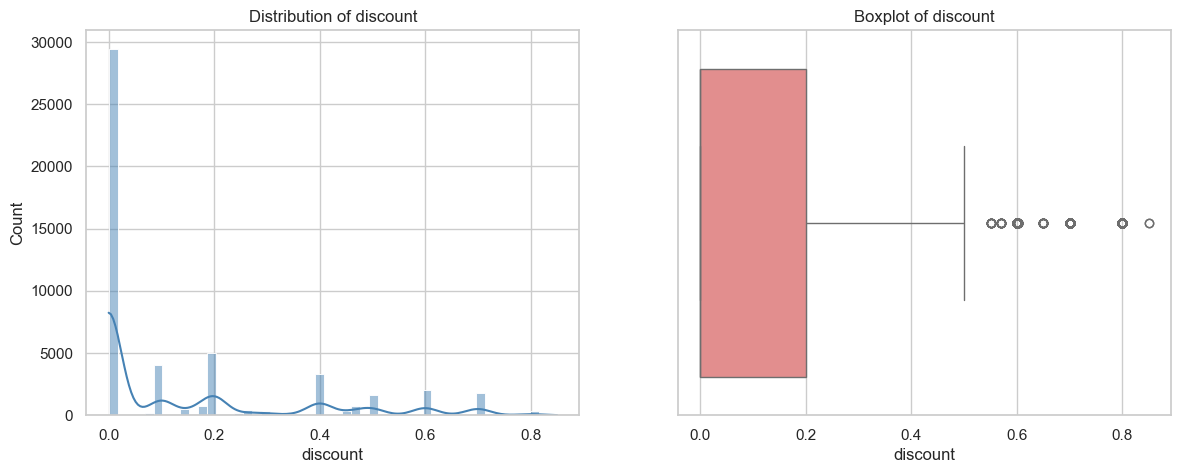

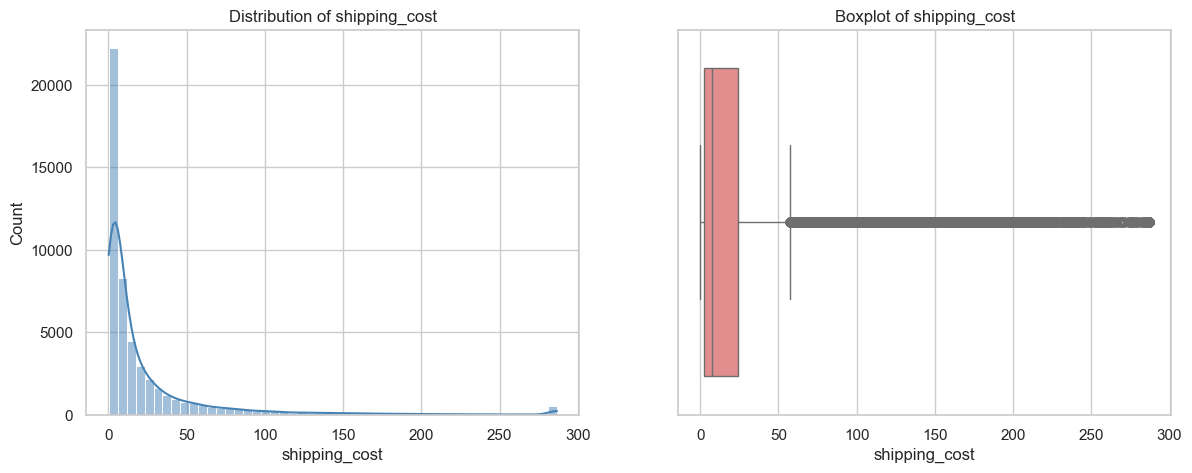

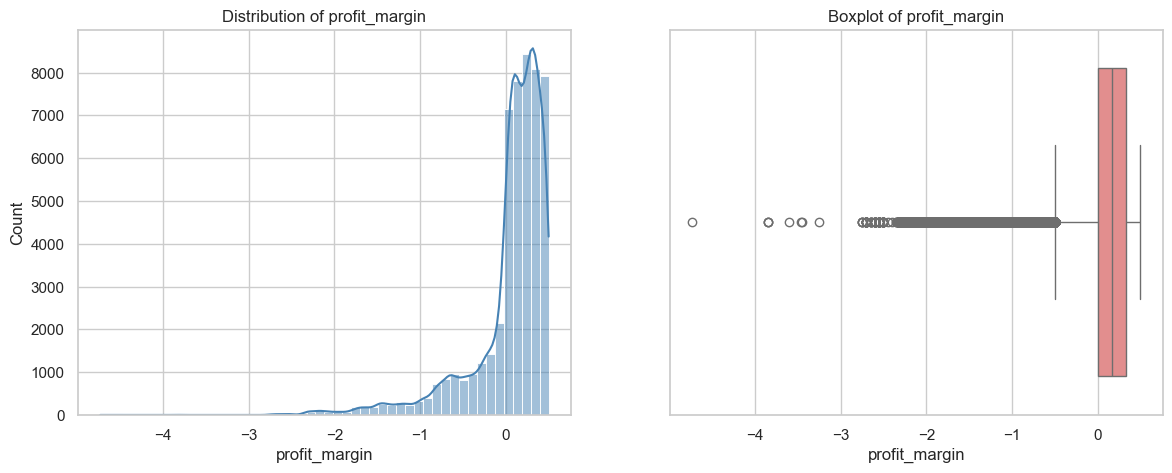

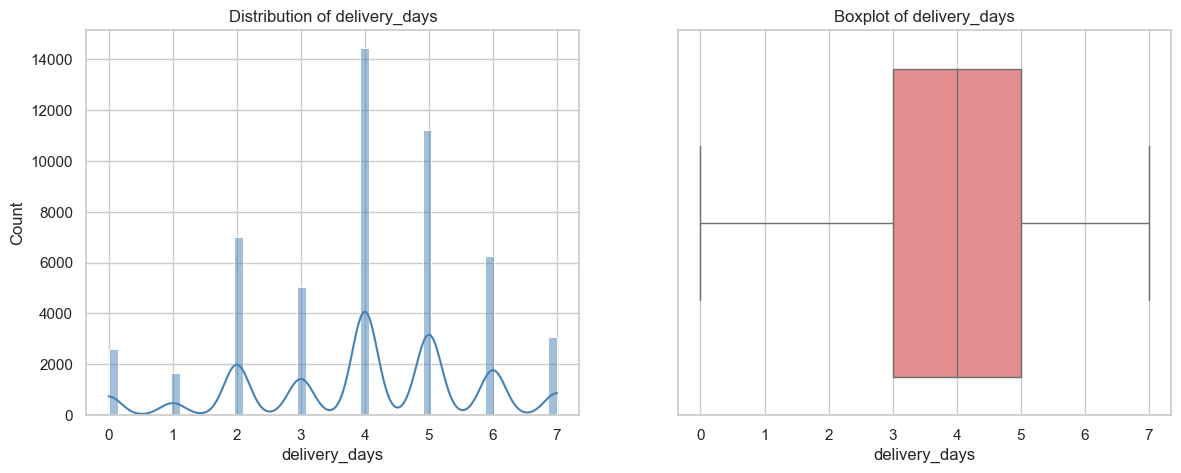

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10,6)

# Folder to save plots
save_dir = "../visuals/univariate/numerical_plots"
os.makedirs(save_dir, exist_ok=True)

# === Numeric Variables ===
num_cols = ["sales", "profit", "quantity", "discount", "shipping_cost", "profit_margin", "delivery_days"]

for col in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(14,5))
    
    # Histogram
    sns.histplot(df_clean[col], bins=50, kde=True, ax=ax[0], color="steelblue")
    ax[0].set_title(f"Distribution of {col}")
    
    # Boxplot
    sns.boxplot(x=df_clean[col], ax=ax[1], color="lightcoral")
    ax[1].set_title(f"Boxplot of {col}")

    # Save plot
    file_path = os.path.join(save_dir, f"{col}_plot.png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")
    
    plt.show()

#### Interpretation:

- `Sales`/`Profit` : **Skewed** (long right tail), a few extreme high orders.
- `Profit` : Many small profits/losses, some extreme losses (even after capping).
- `Quantity` : Mostly between `1–5`, rarely >`10`.
- `Discount`: Strong peaks at **common discount levels** (e.g., `0%`, `20%`, `50%`).
- `Shipping Cost` : **Right-skewed**; most shipments are low cost, few very high.
- `Profit Margin` : Mix of low/negative values (losses) and high values.
- `Delivery Days` : Mostly `3–5` days, capped at `7`.

#### 4.1.2. Categorical Variables

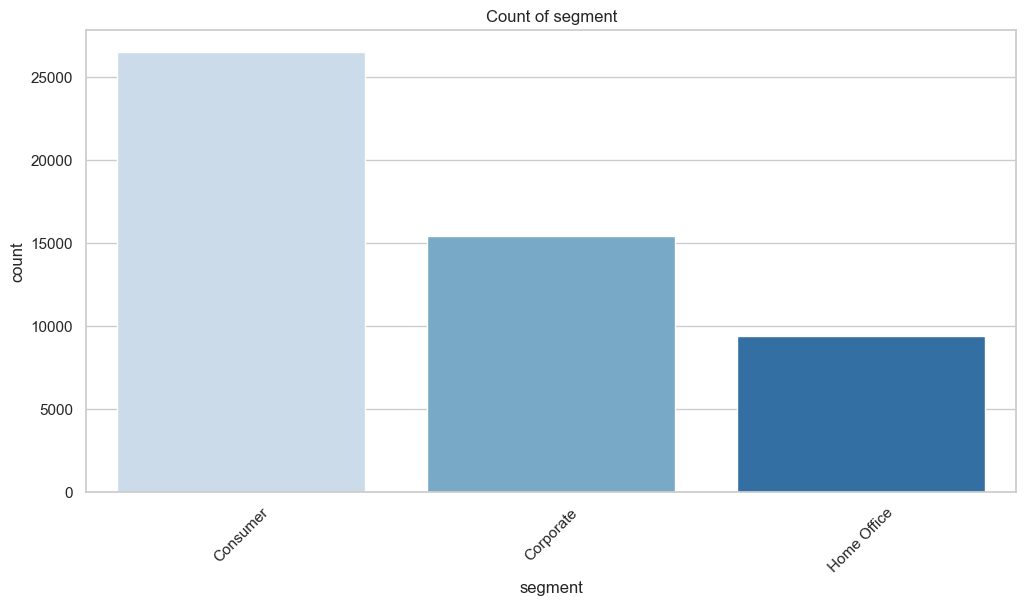

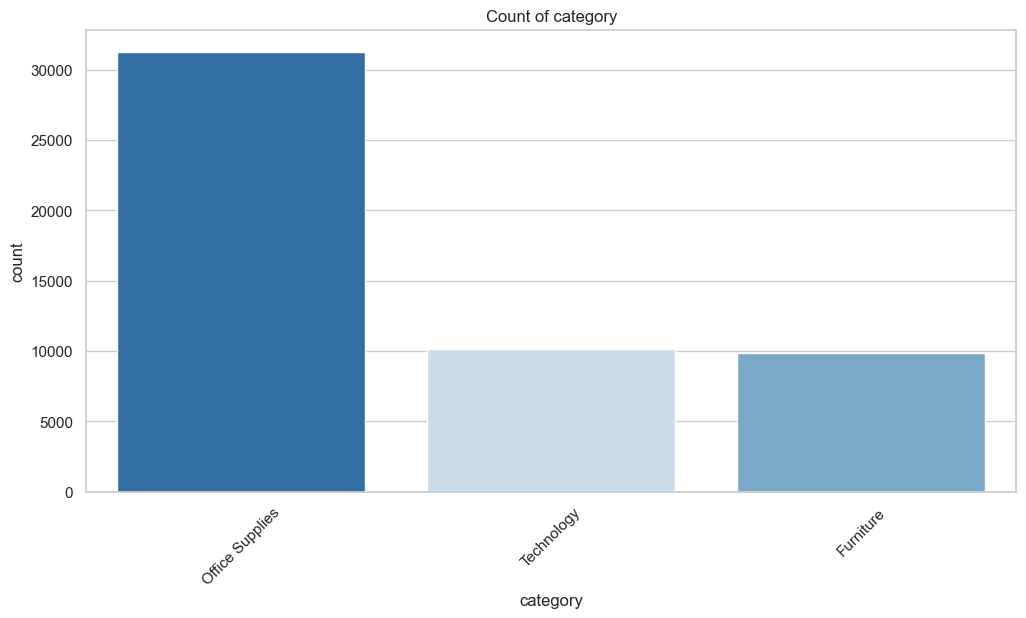

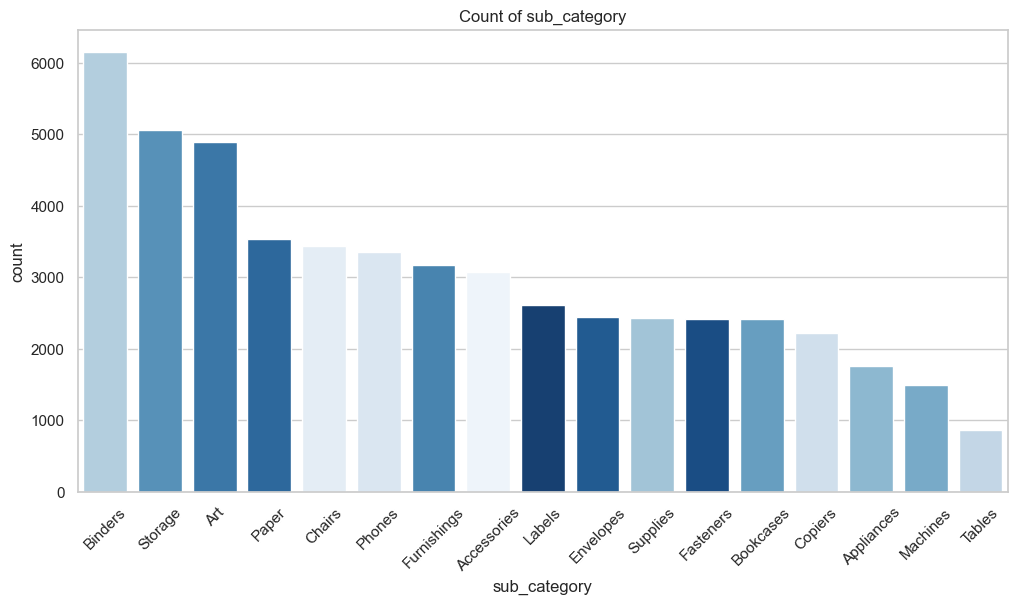

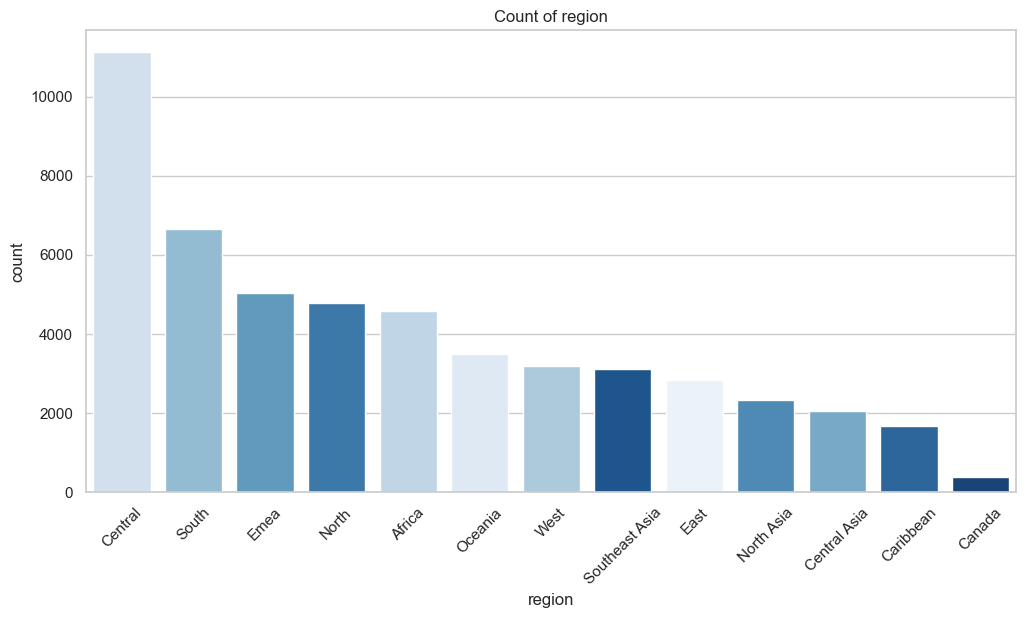

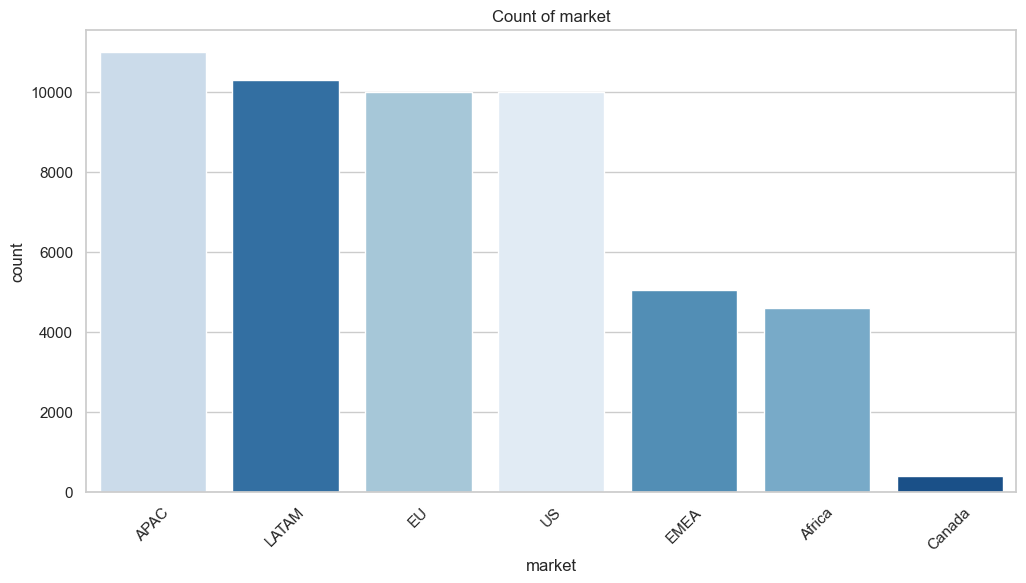

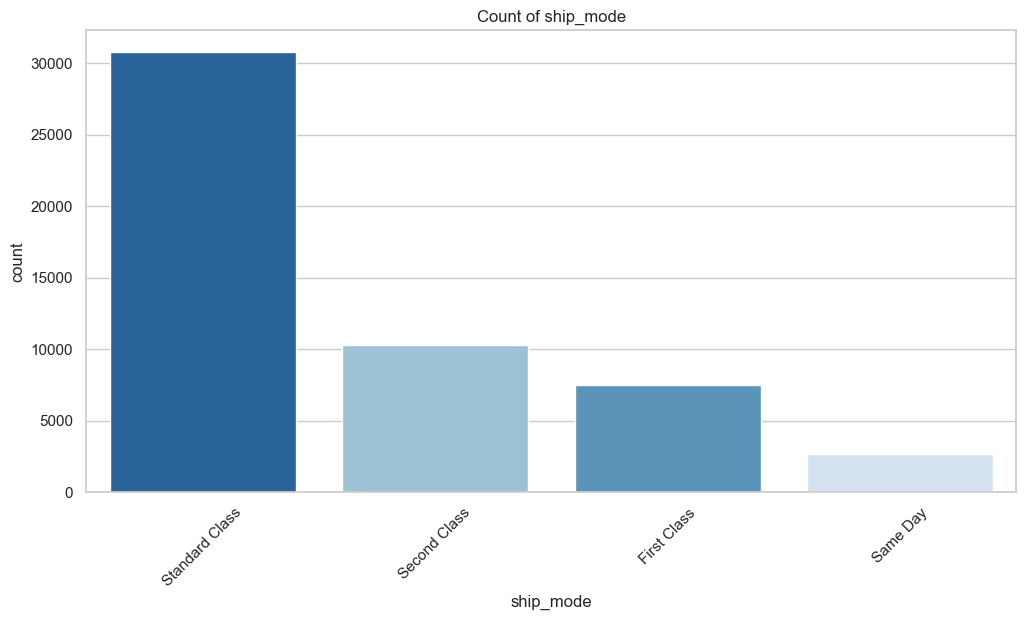

In [23]:
# === Categorical Variables ===
cat_cols = ["segment", "category", "sub_category", "region", "market", "ship_mode"]

# Folder to save plots
save_dir = "../visuals/univariate/categorical_plots"
os.makedirs(save_dir, exist_ok=True)

for col in cat_cols:
    plt.figure(figsize=(12,6))
    order = df_clean[col].value_counts().index

    palette = sns.color_palette("Blues", n_colors=len(order))
    sns.countplot(data=df_clean, hue=df_clean[col], x=col, order=order, palette=palette)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)

    # Save plot
    file_path = os.path.join(save_dir, f"{col}_countplot.png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")
    plt.show()

#### Interpretation:

- `Segment` : Consumers dominate (`≈50%`), Corporate second, Home Office smaller.
- `Category` : Office Supplies largest share, then Technology & Furniture.
- `Sub-Category` : Some dominate (Binders, Storage, Art, Phones, Chairs).
- `Region/Market` : More orders from Central, South, EMEA; smaller in Canada/Caribbean.
- `Ship Mode` : Standard Class is most common; Same Day is rare.

---
### 4.2. Bivariate Analysis
#### 4.2.1. Correlation Heatmap

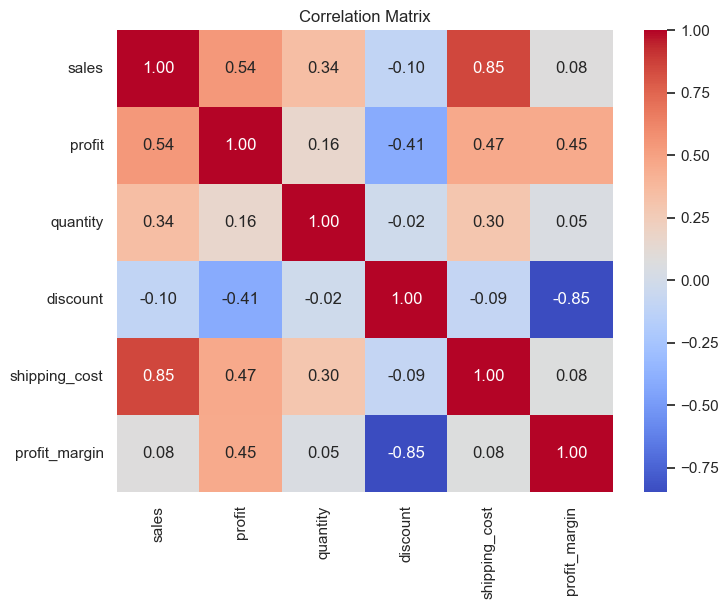

In [24]:
# Folder to save plots
save_dir = "../visuals/bivariate"
os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(8,6))
sns.heatmap(df_clean[["sales","profit","quantity","discount","shipping_cost","profit_margin"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

file_path = os.path.join(save_dir, f"correlation_heatmap.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation:
- `Sales` & `Shipping Cost` : **Strong positive correlation** (big orders → high shipping).
- `Profit` & `Discount` : **Moderate negative correlation** (more discount → less profit).
- `Profit Margin`& `Discount` : **Strong negative correlation** (more discount → less profit).
- `Profit Margin` **weakly correlated** with `Sales` — big sales ≠ high margin.
- `Profit Margin` **weakly correlated** with `Quantity` — big quantity ≠ high margin.
- `Sales` **weakly correlated** with `Discount` — large discount ≠ big sales. 

#### 4.2.2. Discount vs Profit

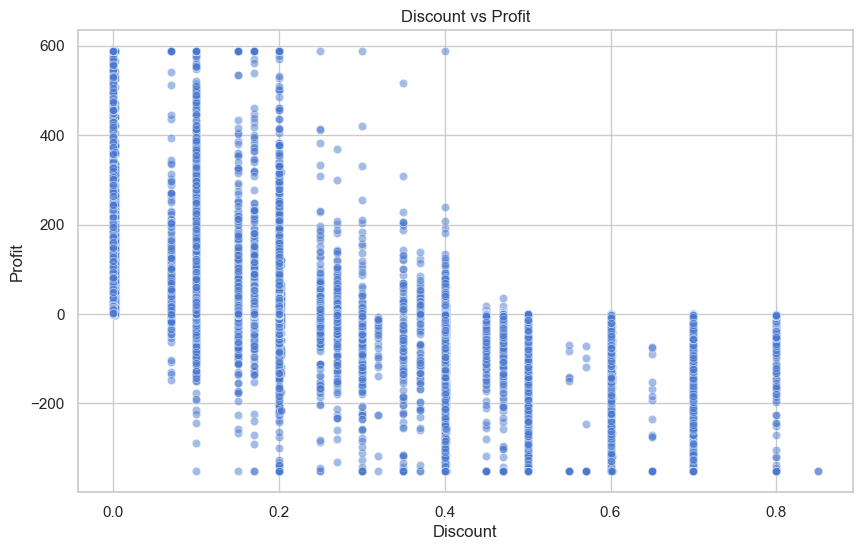

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="discount", y="profit", alpha=0.5)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
file_path = os.path.join(save_dir, "discount_vs_profit.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation:
- At `0% discount` : **wide spread of profit** (some big losses, many gains).
- At `20%+ discount` : **profit mostly negative** → discounts hurt profitability.

#### 4.2.3. Segment vs Sales/Profit

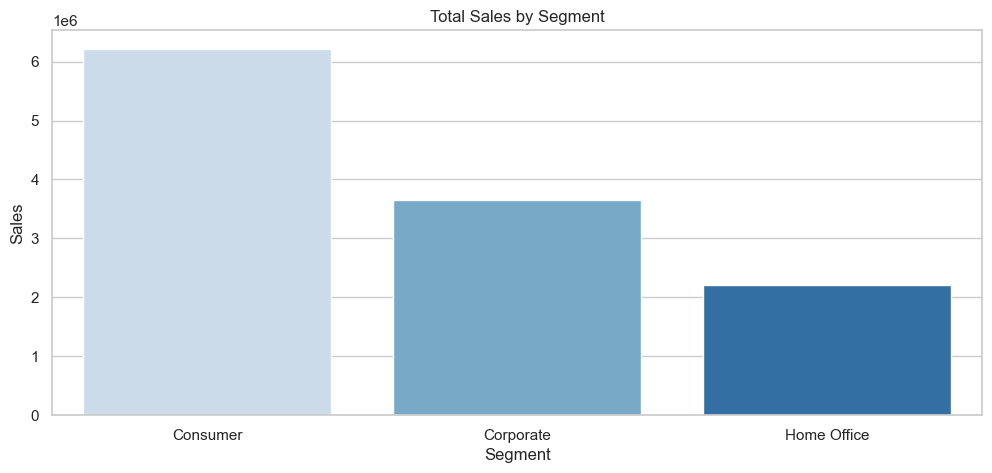

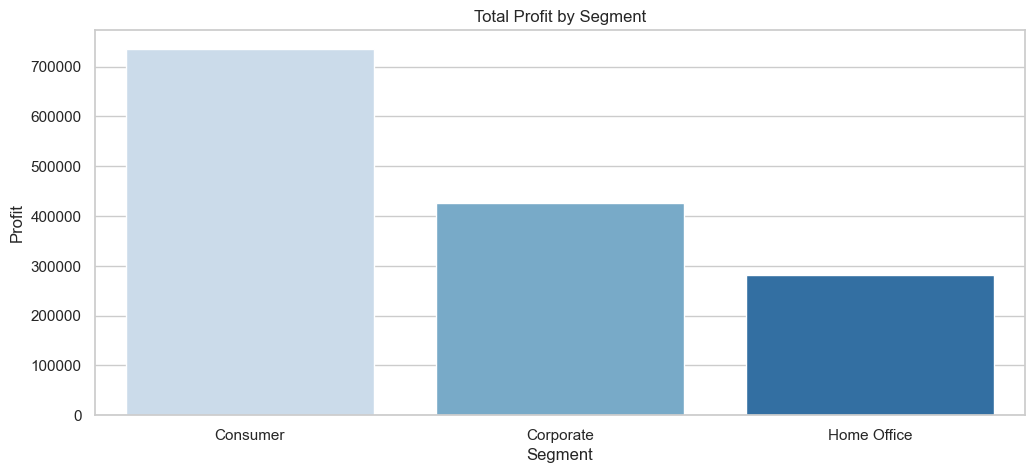

In [26]:
plt.figure(figsize=(12,5))
segments = df_clean["segment"].nunique()  # number of unique categories
palette = sns.color_palette("Blues", n_colors=segments)  # exactly that many colors
sns.barplot(data=df_clean, x="segment", y="sales", hue="segment", estimator=sum, errorbar=None, palette=palette, legend=False)
plt.title("Total Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
file_path = os.path.join(save_dir, "segment_vs_sales.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=df_clean, x="segment", y="profit", hue="segment", estimator=sum, errorbar=None, palette=palette, legend=False)
plt.title("Total Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Profit")
file_path = os.path.join(save_dir, "segment_vs_profit.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation:
- `Consumer` segment → highest total sales AND profit.
- `Corporate` → second.
- `Home Office` smaller share but still profitable.

#### 4.2.4. Category vs Sales/Profit

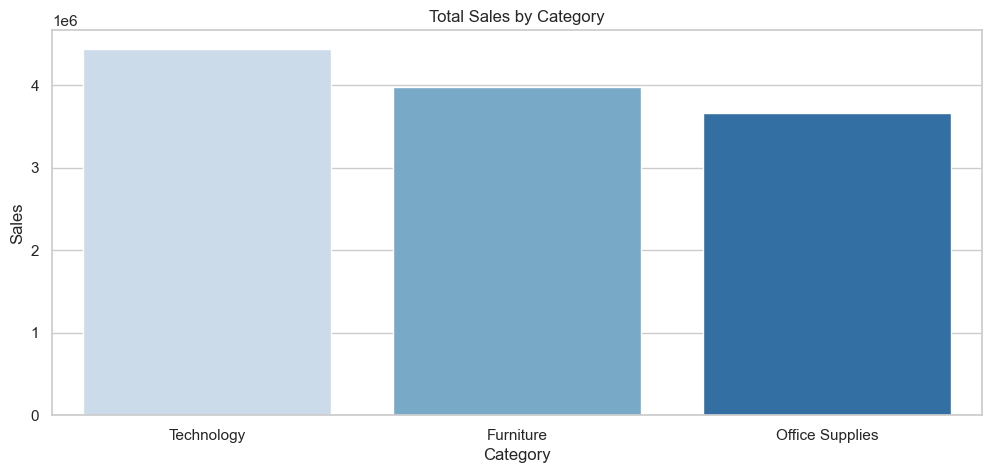

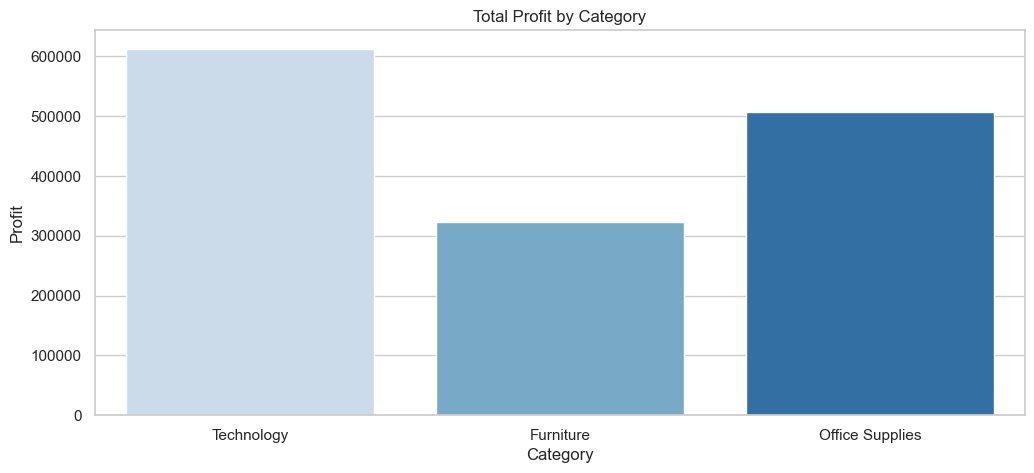

In [27]:
plt.figure(figsize=(12,5))
categories = df_clean["category"].nunique()  # number of unique categories
palette = sns.color_palette("Blues", n_colors=categories)  # exactly that many colors
sns.barplot(data=df_clean, x="category", y="sales", hue="category", estimator=sum, errorbar=None, palette=palette, legend=False)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
file_path = os.path.join(save_dir, "category_vs_sales.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=df_clean, x="category", y="profit", hue="category", estimator=sum, errorbar=None, palette=palette, legend=False)
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
file_path = os.path.join(save_dir, "category_vs_profit.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation:
- `Office Supplies` → largest share of sales.
- `Technology` → smaller sales than supplies but most profitable.
- `Furniture` → good sales but lowest profitability (many losses).

#### 4.2.5. Ship Mode vs Delivery Days

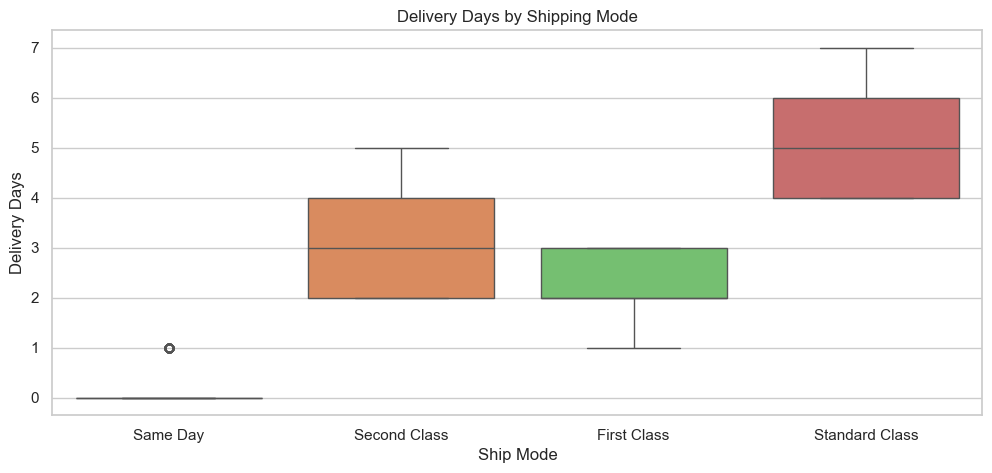

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_clean, x="ship_mode", y="delivery_days", hue="ship_mode", palette="muted")
plt.title("Delivery Days by Shipping Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Delivery Days")
file_path = os.path.join(save_dir, "shipmode_vs_deliverydays.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation:
- `Same Day` → delivery in 0–1 day
- `First Class`: ~2–3 days
- `Second Class`: ~3–5 days
- `Standard Class`: ~5+ days

#### 4.2.6. Region vs Category

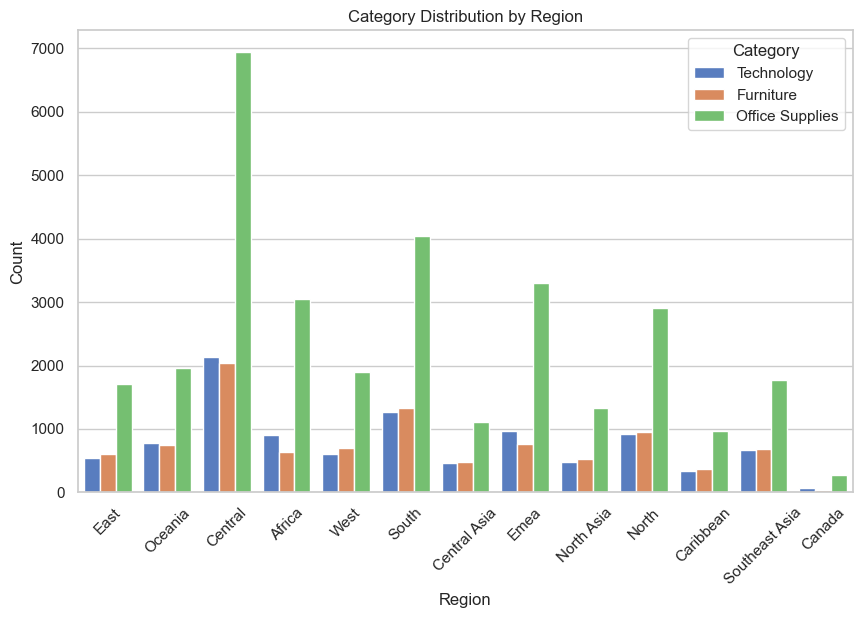

In [29]:
# Create a grouped bar plot
sns.countplot(data=df_clean, x='region', hue='category')

plt.title('Category Distribution by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.xticks(rotation=45)  # Rotate if needed
plt.legend(title='Category')

file_path = os.path.join(save_dir, "region_vs_category.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
- `Office Supplies` → Most favoured category across all regions
- `Technology` over `Furniture`: prevalent in `Central`, `Africa`, `EMEA`, `Canada` regions 

#### 4.2.7. Segment vs Ship Mode

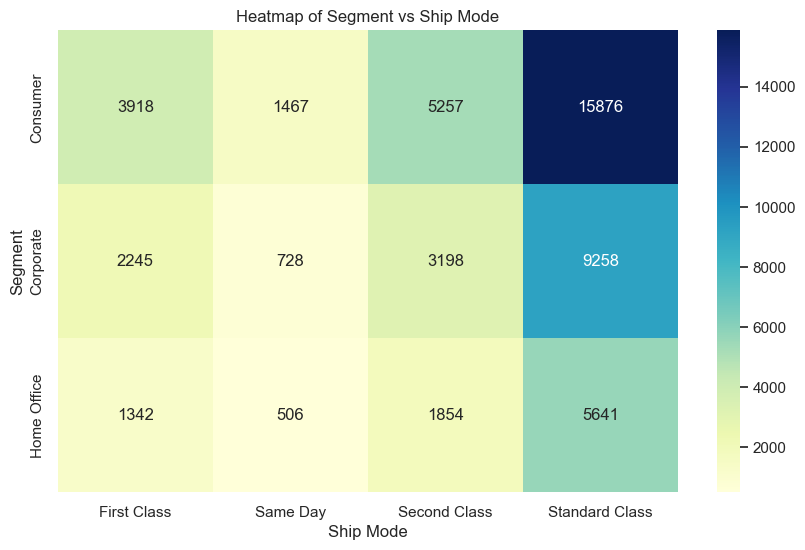

In [30]:
# Create a crosstab of segment vs ship_mode
ct = pd.crosstab(df_clean['segment'], df_clean['ship_mode'])

# Plot as heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Segment vs Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Segment')

file_path = os.path.join(save_dir, "segment_vs_ship_mode.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
A clear pattern can be observed here:
* `Standard Class` mode of shipping is highest across the Segments
* `Ship Mode` across `Segments`: `Standard Class`>`Second Class`>`First Class`>`Same Day`

#### 4.2.8. Region vs Profit

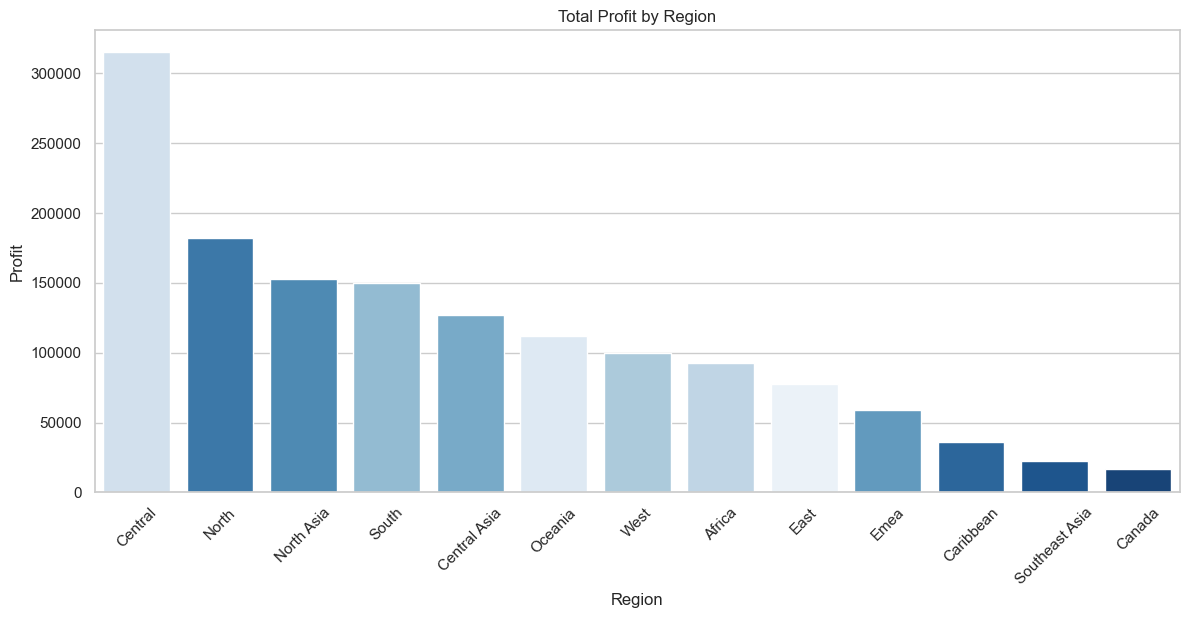

In [31]:
# Compute total profit per region
region_order = (df_clean.groupby("region")["profit"].sum().sort_values(ascending=False).index)

plt.figure(figsize=(14,6))
regions = df_clean["region"].nunique()  # number of unique categories
palette = sns.color_palette("Blues", n_colors=regions)  # exactly that many colors
sns.barplot(data=df_clean, x="region", y="profit", hue="region", estimator=sum, errorbar=None, palette=palette, order=region_order)
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Profit")
file_path = os.path.join(save_dir, "region_vs_profit.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.title("Total Profit by Region")
plt.show()

#### Interpretation:
- `Central` Region is strongly profitable.
- Some regions (`North`, `North Asia`, `South`) are moderately profitable.
- Others (e.g., Furniture-heavy regions) may drag down profits.

---

### 4.3. Multivariate Analysis
#### 4.3.1. Profitability by Region & Category

In [32]:
# Folder to save plots
save_dir = "../visuals/multivariate"
os.makedirs(save_dir, exist_ok=True)

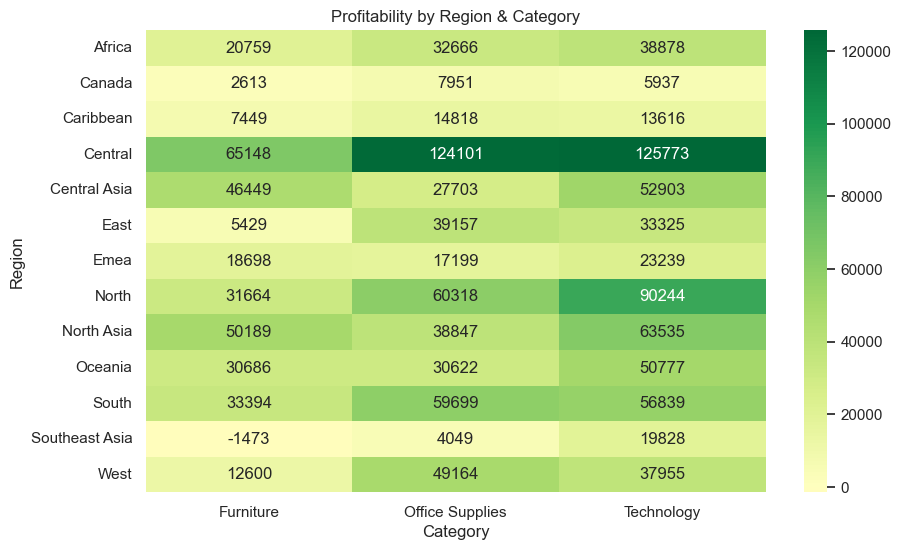

In [33]:
pivot_region_cat = df_clean.pivot_table(
    values="profit", index="region", columns="category", aggfunc="sum"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_region_cat, annot=True, fmt=".0f", cmap="RdYlGn", center=0)
plt.title("Profitability by Region & Category")
plt.xlabel("Category")
plt.ylabel("Region")

file_path = os.path.join(save_dir, "profitabilityByRegionCategory.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
`Region` × `Category` heatmap → shows which regions/categories are **profit drivers** vs **loss-makers**
- `Central` Region dominates sales and profits across all categories
- `Central`/`North` Regions : dominate profits in **Technology** & **Office Supplies**
- `Southeast Asia` shows losses in **Furniture** category

#### 4.3.2. Sales & Profit by Segment and Category

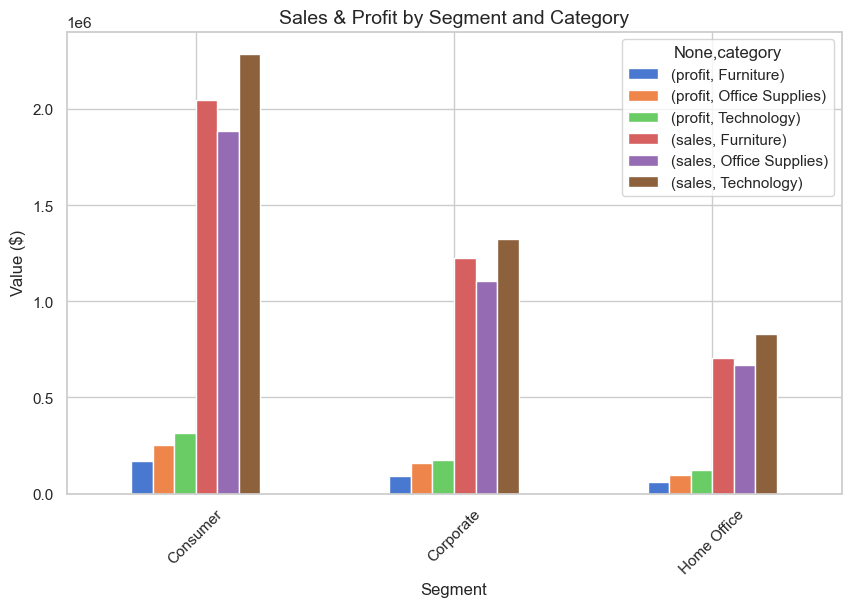

In [34]:
pivot_seg_cat = df_clean.pivot_table(
    values=["sales", "profit"], index="segment", columns="category", aggfunc="sum"
)

pivot_seg_cat.plot(kind="bar", figsize=(10,6))
plt.title("Sales & Profit by Segment and Category", fontsize=14)
plt.ylabel("Value ($)")
plt.xlabel("Segment")
plt.xticks(rotation=45)

file_path = os.path.join(save_dir, "SalesProfitBySegmentCategory.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
`Segment` × `Category` bar chart → shows which **customer segment** drives most sales vs profits
- `Consumers` usually generate the **highest Sales overall**
- `Corporate` or `Home Office` segments may have **lower Sales** but **different Profitability structures**
- Useful to identify: if high `Sales` = high `Profit`, or if discounts erode margins

#### 4.3.3. Region, Category, Sub-category Combined

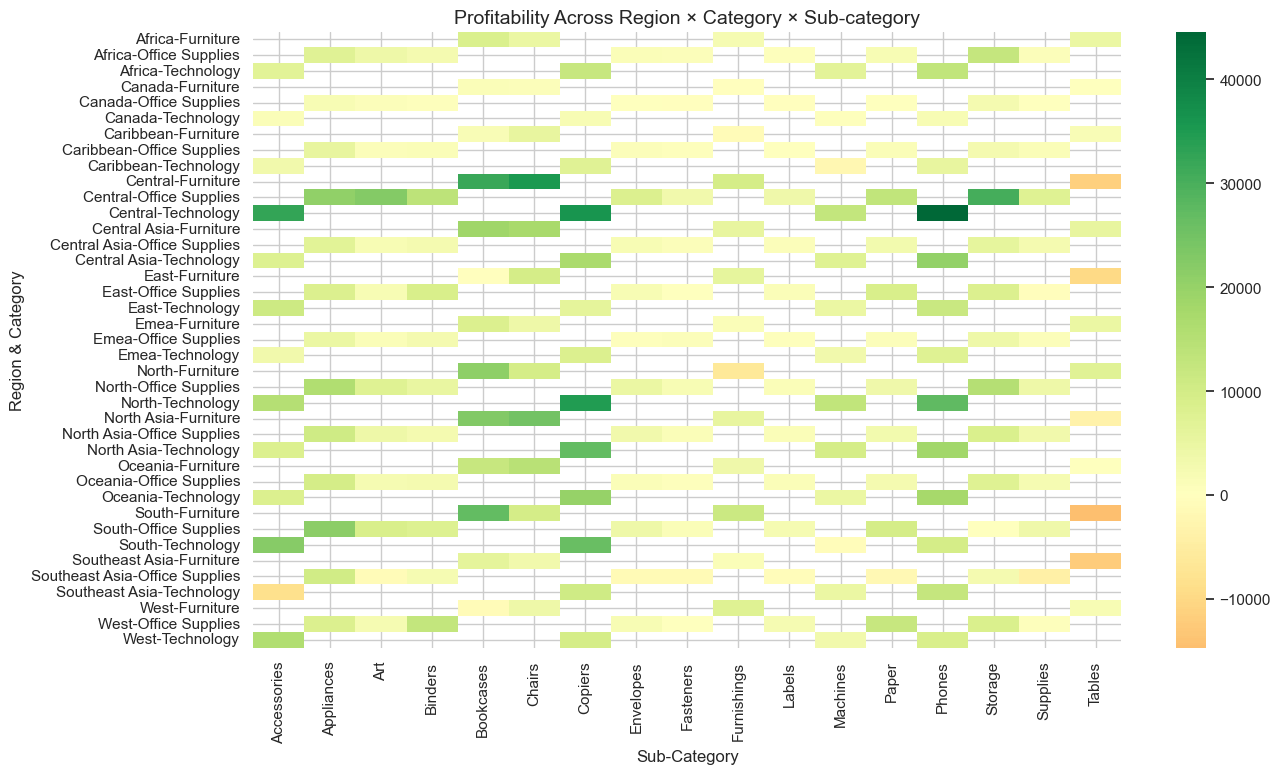

In [35]:
pivot_multi = df_clean.pivot_table(
    values="profit", index=["region", "category"], columns="sub_category", aggfunc="sum"
)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_multi, cmap="RdYlGn", center=0)
plt.title("Profitability Across Region × Category × Sub-category", fontsize=14)
plt.ylabel("Region & Category")
plt.xlabel("Sub-Category")

file_path = os.path.join(save_dir, "region-category-subcategory.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
`Region` × `Category` × `Sub-category` → deeper drill-down (**great for finding product-market mismatches**)
- This heatmap reveals **very specific weak spots** (e.g., **"Tables"** in multiple regions is `often loss-making`)
- Highlights product lines that work in one geography but fail in another

#### 4.3.4. Top 10 Customers by Profit

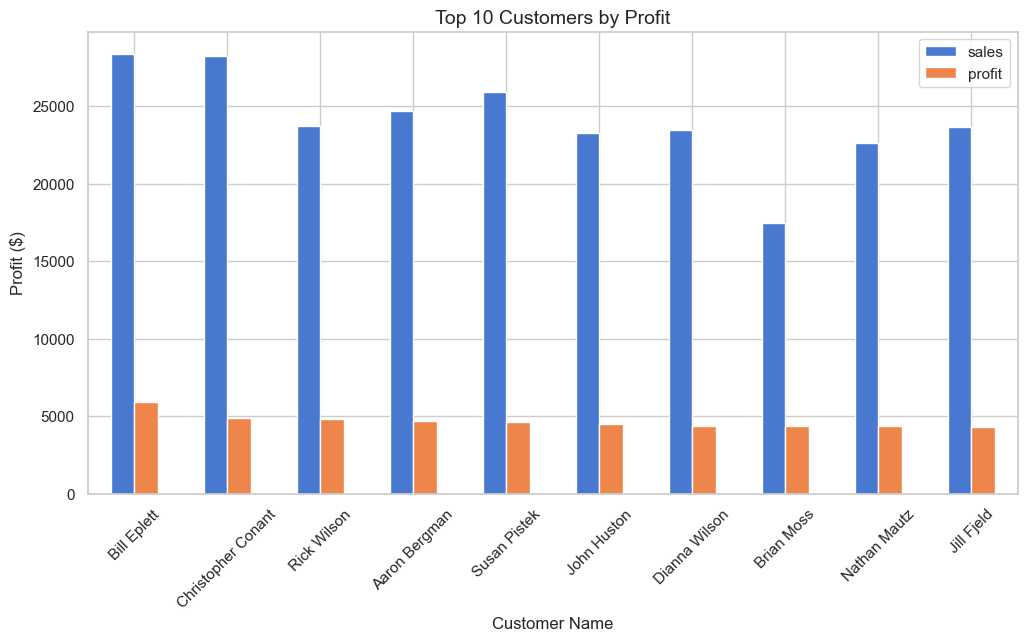

In [36]:
top_customers = (
    df_clean.groupby("customer_name")[["sales","profit"]].sum().sort_values("profit", ascending=False).head(10)
)

top_customers.plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Customers by Profit", fontsize=14)
plt.xlabel("Customer Name")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)

file_path = os.path.join(save_dir, "top10customers.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
**Top 10 Customers** → useful for identifying high-value clients (most valuable customers)
- Useful for **targeted loyalty programs, upselling, or preferential service**

#### 4.3.5. Top 10 Products by Loss (Negative Profit)

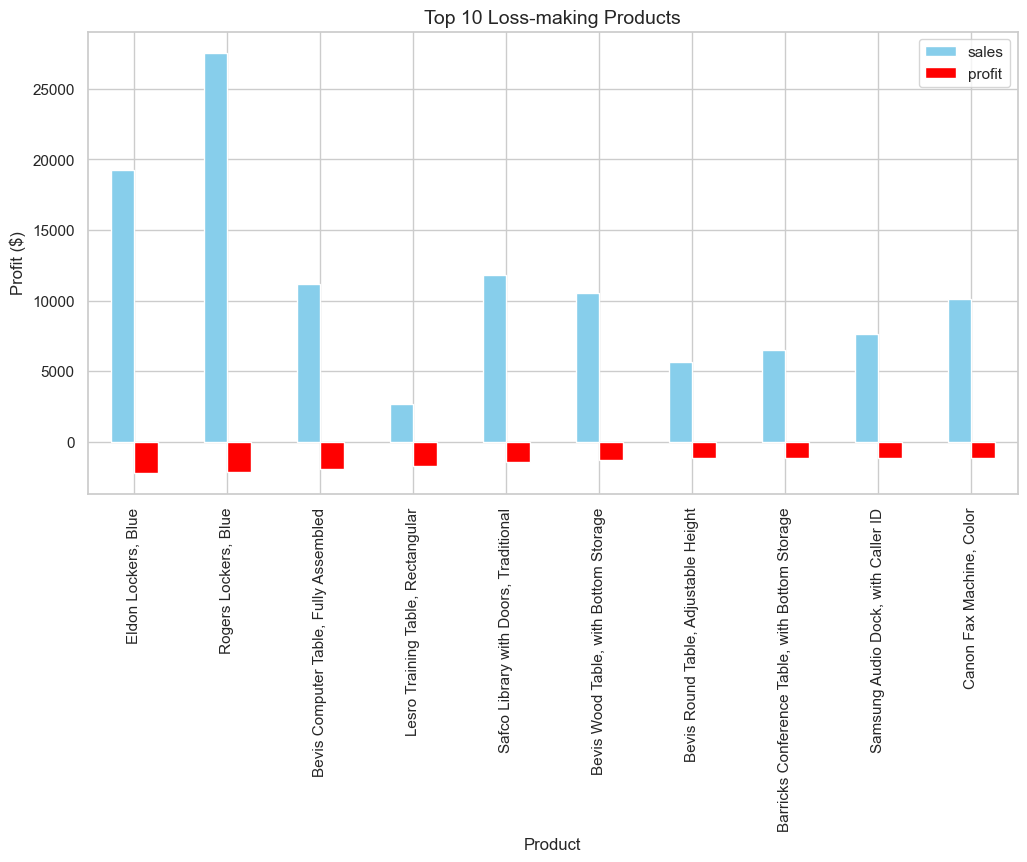

In [37]:
loss_products=(
    df_clean.groupby("product_name")[["sales","profit"]].sum().sort_values("profit").head(10)
)

loss_products.plot(kind="bar", figsize=(12,6), color=["skyblue","red"])
plt.title("Top 10 Loss-making Products", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Profit ($)")

file_path = os.path.join(save_dir, "top10ProductsByLoss.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
**Top Loss-making Products** → critical for **decision-making**
- Shows which products consistently lose money (even with decent Sales)
- Business decisions could include revisiting pricing, supplier costs, or discontinuation.

---
### 4.4. Trend Analysis (Time-Series)
#### 4.4.1. Monthly Sales & Profit Trend

In [38]:
# Folder to save plots
save_dir = "../visuals/trend_analysis"
os.makedirs(save_dir, exist_ok=True)

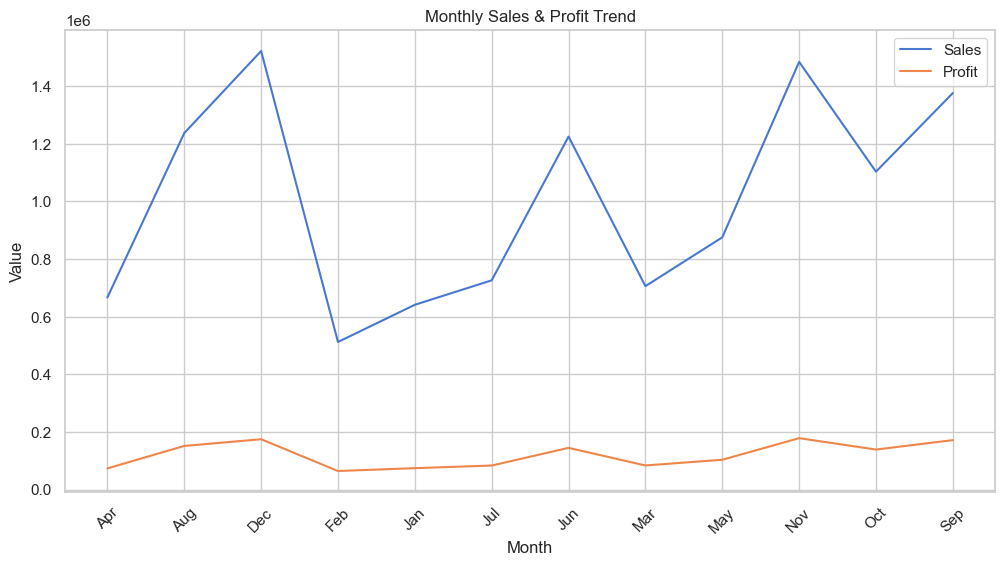

In [39]:
monthly_trend = df_clean.groupby("month_name")[["sales", "profit"]].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x="month_name", y="sales", label="Sales")
sns.lineplot(data=monthly_trend, x="month_name", y="profit", label="Profit")
plt.xticks(rotation=45)
plt.title("Monthly Sales & Profit Trend")
plt.ylabel("Value")
plt.xlabel("Month")
plt.legend()

file_path = os.path.join(save_dir, "monthlytrend.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
- `Sales` and `Profit` show **clear seasonal spikes** in certain months (likely around festive/holiday seasons).
- `Profit` doesn’t always follow `Sales` — in some months, high sales coexist with low or negative profit, suggesting heavy discounting or high shipping costs.

#### 4.4.2. Yearly Growth of Sales & Profit

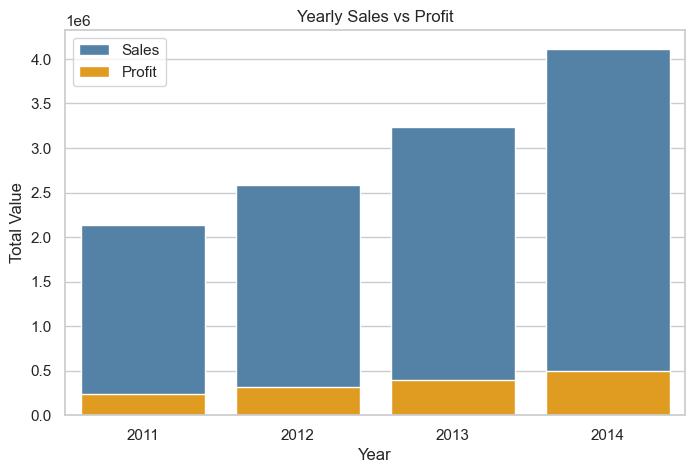

In [40]:
yearly_trend = df_clean.groupby("year")[["sales", "profit"]].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=yearly_trend, x="year", y="sales", color="steelblue", label="Sales")
sns.barplot(data=yearly_trend, x="year", y="profit", color="orange", label="Profit")
plt.title("Yearly Sales vs Profit")
plt.ylabel("Total Value")
plt.xlabel("Year")
plt.legend()

file_path = os.path.join(save_dir, "yearlytrend.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
- Both `sales` and `profit` have shown a **steady upward trend year-on-year**, indicating **business expansion**.
- However, **profit margins** fluctuate — not all years with high sales generate proportionally high profits.

#### 4.4.3. Monthly Order Volume Trend

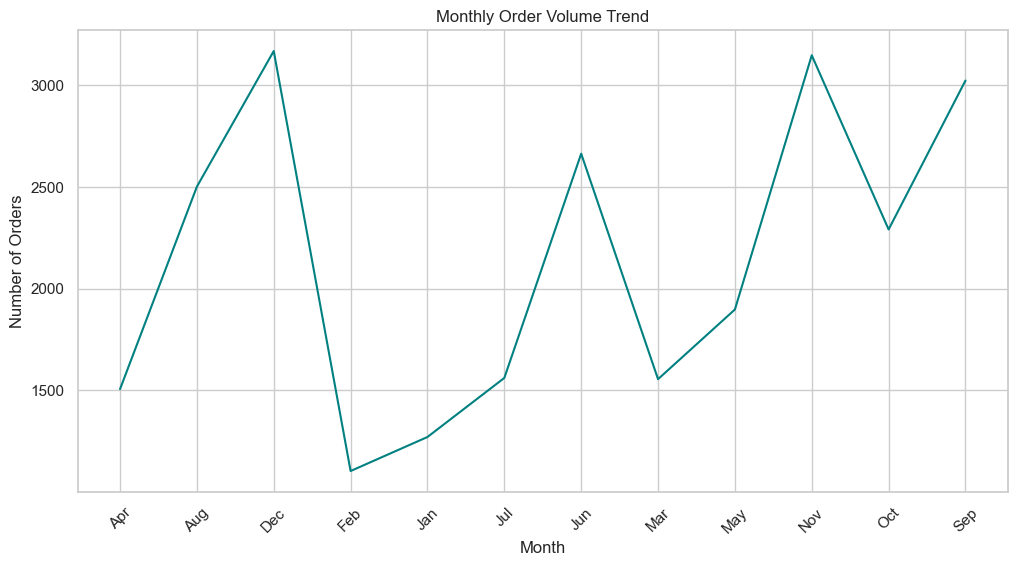

In [41]:
orders_trend = df_clean.groupby("month_name")["order_id"].nunique().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=orders_trend, x="month_name", y="order_id", color="teal")
plt.xticks(rotation=45)
plt.title("Monthly Order Volume Trend")
plt.ylabel("Number of Orders")
plt.xlabel("Month")

file_path = os.path.join(save_dir, "orderstrend.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
- The **number of orders** has a **seasonal pattern** — **peaks during year-end (Q4)** and **occasional dips mid-year**.
- This suggests **customer demand** is **event/season-driven** rather than consistent throughout the year.

#### 4.4.4. Category-wise Sales Trend

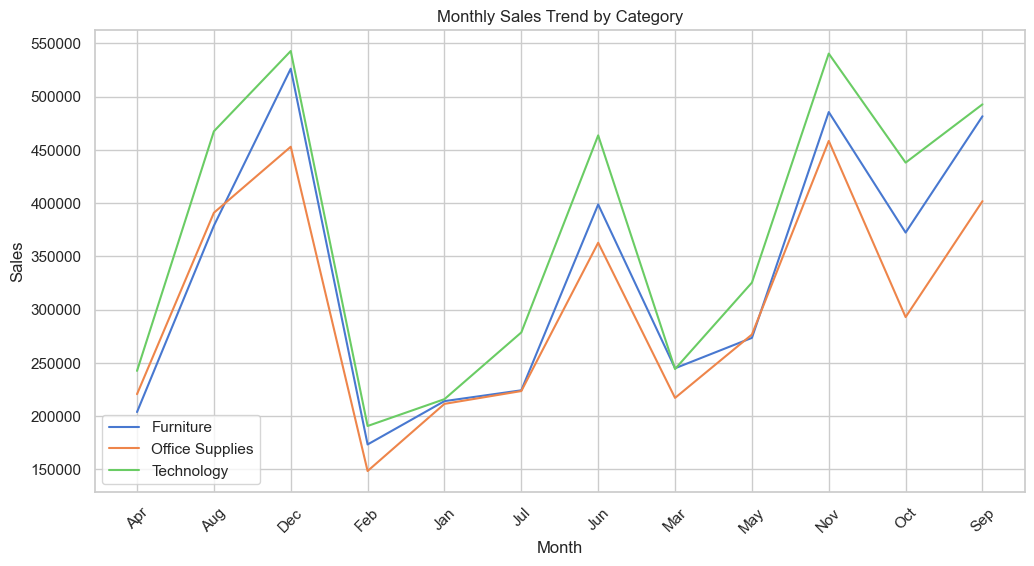

In [42]:
cat_trend = df_clean.groupby(["month_name","category"])["sales"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=cat_trend, x="month_name", y="sales", hue="category")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend by Category")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.legend()

file_path = os.path.join(save_dir, "category-sales-trend.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
- All Categories follows a **similar trend** in sales → all **volatile** in nature
  * `Technology` category shows the **most volatile sales** — sharp peaks during certain months (likely festive/tech launches)
  * `Furniture` sales are **steady but lower** compared to other categories.
  * `Office Supplies` remain **stable throughout the year**, acting as the company’s baseline demand driver.

#### 4.4.5. Year-wise Monthly Sales & Profit Trend

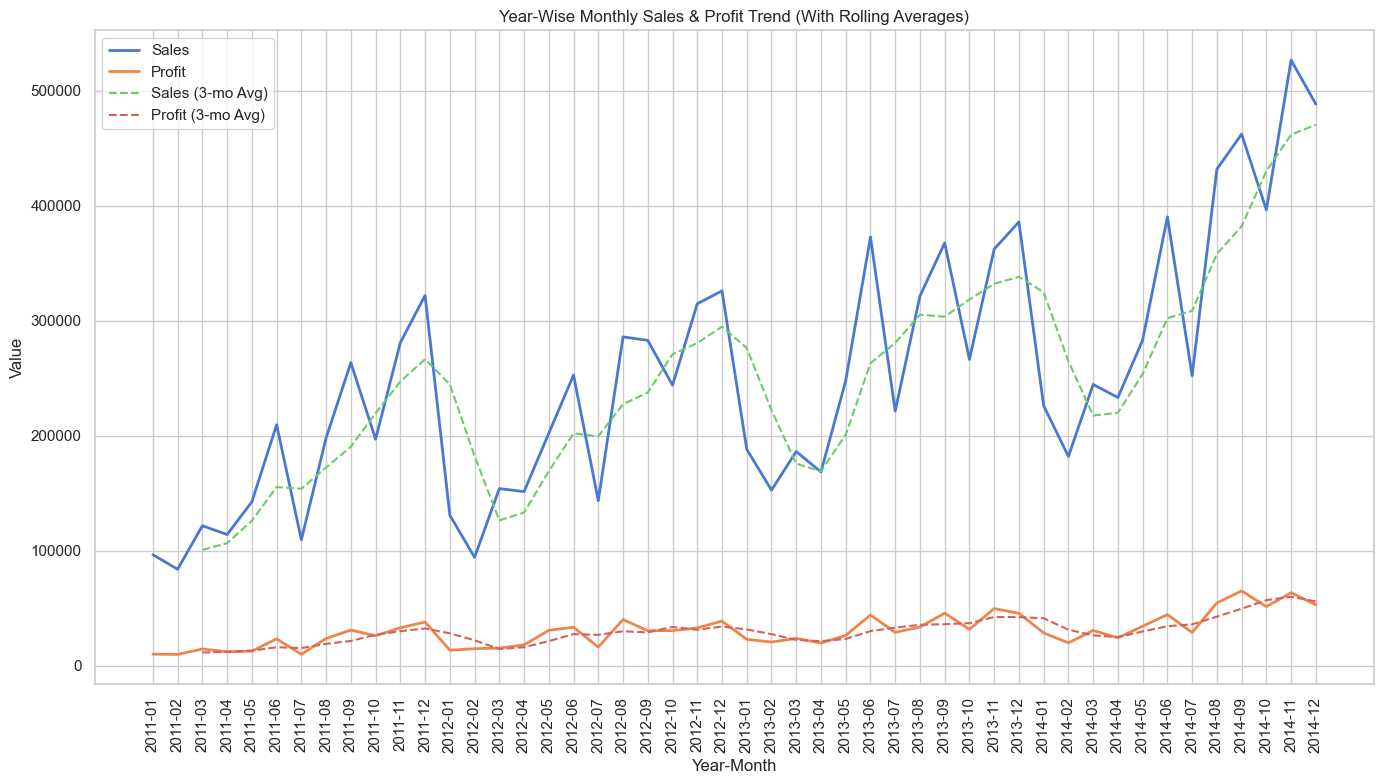

In [43]:
yearly_monthly_trend = df_clean.groupby("month_year")[["sales", "profit"]].sum().reset_index()

# Calculate rolling averages
yearly_monthly_trend["sales_rolling"] = yearly_monthly_trend["sales"].rolling(3).mean()
yearly_monthly_trend["profit_rolling"] = yearly_monthly_trend["profit"].rolling(3).mean()

# Plot
plt.figure(figsize=(14, 8))

# Actual values
sns.lineplot(data=yearly_monthly_trend, x="month_year", y="sales", label="Sales", linewidth=2)
sns.lineplot(data=yearly_monthly_trend, x="month_year", y="profit", label="Profit", linewidth=2)

# Rolling averages
sns.lineplot(data=yearly_monthly_trend, x="month_year", y="sales_rolling", label="Sales (3-mo Avg)", linestyle="--")
sns.lineplot(data=yearly_monthly_trend, x="month_year", y="profit_rolling", label="Profit (3-mo Avg)", linestyle="--")

# Final touches
plt.xticks(rotation=90)
plt.title("Year-Wise Monthly Sales & Profit Trend (With Rolling Averages)")
plt.ylabel("Value")
plt.xlabel("Year-Month")
plt.legend()
plt.tight_layout()

file_path = os.path.join(save_dir, "year-month-trend.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
- The `line chart` reveals both seasonality (repeating monthly patterns) and overall growth trend.
- `Sales` consistently spike during certain months each year (likely around festive/holiday seasons or year-end clearance periods).
- `Profit` lines show a similar pattern but with much sharper fluctuations — in some high-sales months, profit dips noticeably, suggesting promotions, discounts, or high shipping costs eating into margins.
- Over the years, the baseline level of sales and profit increases, confirming steady business growth.
- A **rolling average** (also called a `moving average`) smooths short-term fluctuations in data to highlight longer-term trends or cycles.
  * **Monthly values** can be **volatile** due to:
    - Seasonal effects (e.g., holidays, end-of-quarter sales)
    - One-time promotions
    - Market shifts
- However, **volatility in profit** indicates the **business may not always be effectively converting higher sales into higher profit** — signaling margin management challenges.

---
### 4.5. Cohort / Customer Trend Analysis
#### 4.5.1 Unique Customers Per Year

In [44]:
# Folder to save plots
save_dir = "../visuals/advance_analysis"
os.makedirs(save_dir, exist_ok=True)

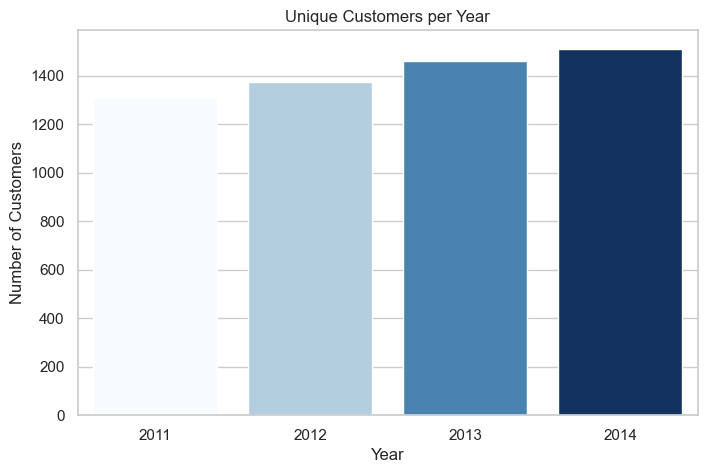

,year,customer_id
0,2011,1309
1,2012,1373
2,2013,1458
3,2014,1511


In [45]:
# Unique customers per year
customers_per_year = df_clean.groupby("year")["customer_id"].nunique().reset_index()

plt.figure(figsize=(8,5))

sns.barplot(data=customers_per_year, x="year", y="customer_id", hue="year", palette="Blues", legend=False)
plt.title("Unique Customers per Year")
plt.ylabel("Number of Customers")
plt.xlabel("Year")

file_path = os.path.join(save_dir, "unique_customers.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

customers_per_year

#### Interpretation
- It shows whether the company is successfully acquiring new customers each year. A **rising trend = strong acquisition**

#### 4.5.2. Average Order Value (AOV) per Year
- Helps understand if customer spending per order is increasing or not.

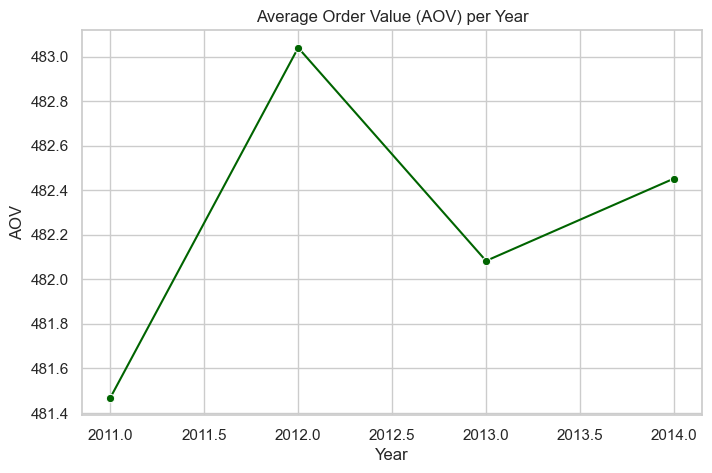

,year,sales
0,2011,481.468297
1,2012,483.040332
2,2013,482.083092
3,2014,482.452786


In [46]:
# Calculate order-level sales
order_sales = df_clean.groupby(["year","order_id"])["sales"].sum().reset_index()

# Average order value per year
aov_yearly = order_sales.groupby("year")["sales"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=aov_yearly, x="year", y="sales", marker="o", color="darkgreen")
plt.title("Average Order Value (AOV) per Year")
plt.ylabel("AOV")
plt.xlabel("Year")

file_path = os.path.join(save_dir, "AOVyearly.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

aov_yearly

#### Interpretation
* `Increasing` → customers spend more per order (good sign);
* `Flat`/`Declining` → possible discounting strategy or smaller-ticket orders.
  
#### 4.5.3. Customer Retention (Cohort)
- Tracks how many customers return in following years (loyalty).

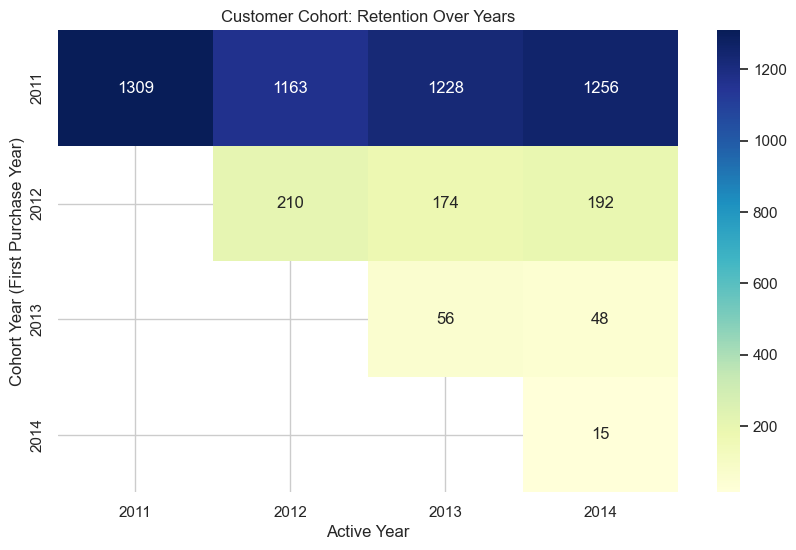

year,2011,2012,2013,2014
cohort_year,,,,
2011,1309.0,1163.0,1228.0,1256.0
2012,NaN,210.0,174.0,192.0
2013,NaN,NaN,56.0,48.0
2014,NaN,NaN,NaN,15.0


In [47]:
# First purchase year for each customer
customer_first_year = df_clean.groupby("customer_id")["year"].min().reset_index()
customer_first_year.columns = ["customer_id", "cohort_year"]

# Merge cohort info
df_cohort = df_clean.merge(customer_first_year, on="customer_id")

# Cohort table: for each cohort year, how many customers active in subsequent years
cohort_pivot = (
    df_cohort.groupby(["cohort_year", "year"])["customer_id"].nunique()
    .reset_index()
    .pivot(index="cohort_year", columns="year", values="customer_id")
)

plt.figure(figsize=(10,6))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Customer Cohort: Retention Over Years")
plt.ylabel("Cohort Year (First Purchase Year)")
plt.xlabel("Active Year")

file_path = os.path.join(save_dir, "cohort.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

cohort_pivot

#### Cohort Analysis Interpretation
* Diagonal (cohort year itself) is always highest → all new customers.
* Off-diagonal values show how many come back in later years → retention strength.
* If numbers drop fast → weak loyalty; if stable → strong repeat customer base.

The cohort table tracks customer retention over time:
1. `Diagonal values` (e.g., 2011→2011 = 1309) are always the highest in each row, representing the total number of new customers acquired in that cohort year.
   
2. `Off-diagonal values` show how many of these customers returned in subsequent years, providing a measure of retention strength:
    - The 2011 cohort retained 1163 customers in 2012, 1228 in 2013, and 1256 in 2014, indicating a strong and loyal customer base.
    - Later cohorts (2012 onward) have smaller numbers but still show reasonable retention, e.g., the 2012 cohort retained 174 of 210 customers in 2013 (~17% drop) and 192 in 2014, suggesting some re-engagement.

3. `Retention trends`:
    - A fast drop in off-diagonal numbers would indicate weak loyalty.
    - Here, the cohorts generally show stable or recovering numbers, highlighting a healthy repeat customer pattern, especially for the 2011 cohort.

Overall, the table reveals that the earliest customers exhibit strong loyalty, while newer cohorts are smaller but maintain moderate retention, pointing to consistent engagement and a stable customer base.

> The cohort table tracks customer retention over time. Each cohort’s diagonal represents new customers, while off-diagonal values show how many returned in subsequent years. The 2011 cohort exhibits strong loyalty, retaining most customers over multiple years, while newer cohorts are smaller but maintain moderate retention, indicating a stable and engaged customer base.

---

### 4.6. RFM Analysis (Customer Segmentation)

RFM stands for Recency, Frequency, and Monetary — a customer segmentation technique used in marketing and analytics to understand and classify customer behavior.

| Metric        | Definition                                   | Why It Matters                                  |
| ------------- | -------------------------------------------- | ----------------------------------------------- |
| **Recency**   | How recently a customer made a purchase      | More recent = more likely to buy again          |
| **Frequency** | How often a customer makes a purchase        | Frequent buyers are more engaged and loyal      |
| **Monetary**  | How much money a customer has spent in total | High spenders are more valuable to the business |

RFM helps businesses:
1. Identify **best customers** (e.g., recent, frequent, high spenders)
2. **Target re-engagement campaigns** for inactive or at-risk customers
3. **Personalize marketing** and improve **customer retention**
4. **Prioritize resources** on high-value segments

Typically, each RFM value is scored into quartiles (or deciles):
- `R` (Recency) → **lower values** are better (more recent)
- `F` & `M` → **higher values** are better (more frequent, higher spending)

The combined RFM Score (like 444, 321, etc.) is used for customer segmentation.

1. **Best possible RFM score** : `444` → Very recent, very frequent, very high spender
2. **Worst possible RFM score** : `111` → Long ago, infrequent, low spender

#### Common RFM Segments:
| RFM Score Example | Segment       | Behavior Insights               |
| ----------------- | ------------- | ------------------------------- |
| 444               | Champions     | Recent, frequent, high spenders |
| 341               | Loyal         | Frequent and high spenders      |
| 214               | New Customers | Recent but not frequent (yet)   |
| 111               | Lost          | Inactive, rare, low spenders    |
| 133               | At Risk       | Not recent, used to be valuable |


In [48]:
# RFM = Recency, Frequency, Monetary
from datetime import timedelta

# Choose a reference date (1 day after the last order)
reference_date = df_clean["order_date"].max() + timedelta(days=1)

# Base RFM Calculation
rfm = df_clean.groupby("customer_id").agg({
    "order_date": lambda x: (reference_date - x.max()).days,  # Recency
    "order_id": "nunique",                                    # Frequency
    "sales": "sum"                                            # Monetary
}).reset_index()

rfm.columns = ["customer_id", "recency", "frequency", "monetary"]

# Assign quartiles for segmentation
rfm["R_rank"] = pd.qcut(rfm["recency"], 4, labels=[4,3,2,1])
rfm["F_rank"] = pd.qcut(rfm["frequency"], 4, labels=[1,2,3,4])
rfm["M_rank"] = pd.qcut(rfm["monetary"], 4, labels=[1,2,3,4])

# Combine into RFM Score
rfm["RFM_Score"] = rfm["R_rank"].astype(str) + rfm["F_rank"].astype(str) + rfm["M_rank"].astype(str)

rfm.head()

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score
0,AA-10315,9,19,11707.31700,4,3,3,433
1,AA-10375,7,23,5884.19500,4,3,3,433
2,AA-10480,126,20,17351.21378,1,3,4,134
3,AA-10645,29,36,15343.89070,3,4,4,344
4,AA-315,3,7,2243.25600,4,2,2,422


In [49]:
# Top 5 customers
top_customers = rfm.sort_values("RFM_Score", ascending=False).head(5)

# Bottom 5 customers
bottom_customers = rfm.sort_values("RFM_Score", ascending=True).head(5)

print("Top 5 Customers Based on RFM Score:")
print(top_customers)

print("\nBottom 5 Customers Based on RFM Score:")
print(bottom_customers)

Top 5 Customers Based on RFM Score:
     customer_id  recency  frequency     monetary R_rank F_rank M_rank  \
276     CD-11920        3         27  17325.73740      4      4      4   
873     KM-16375        3         28  15802.95064      4      4      4   
473     DS-13180       15         31  13449.04000      4      4      4   
1042    ML-17755        2         28  13973.25190      4      4      4   
1012    MG-18205        3         29  16362.89560      4      4      4   

     RFM_Score  
276        444  
873        444  
473        444  
1042       444  
1012       444  

Bottom 5 Customers Based on RFM Score:
    customer_id  recency  frequency  monetary R_rank F_rank M_rank RFM_Score
657     HL-5040      189          4   579.570      1      1      1       111
703     JD-5790      300          5  1323.072      1      1      1       111
143     BD-1500      399          3    52.047      1      1      1       111
145     BD-1605      276          5   689.640      1      1      1   

#### Interpretation:
- Customers with **high** `R`, `F`,`M` scores are loyal high-value customers.
- Customers with **low** `R`, `low F`, `low M` are at-risk or churned customers.
- This segmentation helps businesses decide where to spend marketing effort.
---
### 4.7. Pareto Analysis (80/20 Rule)
Pareto Analysis, also known as the 80/20 Rule, is a **decision-making and prioritization technique** based on the idea that:
 > "Roughly 80% of effects come from 20% of causes."

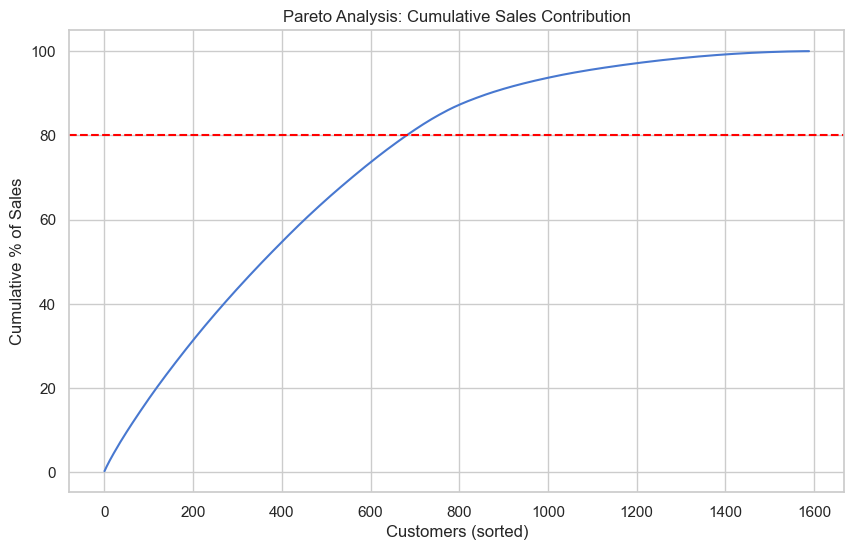

In [50]:
# Contribution of customers to total sales
cust_sales = df_clean.groupby("customer_id")["sales"].sum().reset_index().sort_values("sales", ascending=False)

cust_sales["cum_sales"] = cust_sales["sales"].cumsum()
cust_sales["cum_perc"] = 100 * cust_sales["cum_sales"] / cust_sales["sales"].sum()

# Find cutoff where ~20% of customers contribute ~80% of revenue
pareto_cutoff = cust_sales[cust_sales["cum_perc"] <= 80]

plt.figure(figsize=(10,6))
sns.lineplot(data=cust_sales, x=range(len(cust_sales)), y="cum_perc")
plt.axhline(80, color="red", linestyle="--")
plt.title("Pareto Analysis: Cumulative Sales Contribution")
plt.xlabel("Customers (sorted)")
plt.ylabel("Cumulative % of Sales")

file_path = os.path.join(save_dir, "pareto.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:
- Usually, ~20% of customers contribute ~80% of sales.
- These “vital few” are the most important customers to retain.
- If your curve is steep → strong dependency on top customers.

---
### 4.8. Profitability by Product Sub-Category

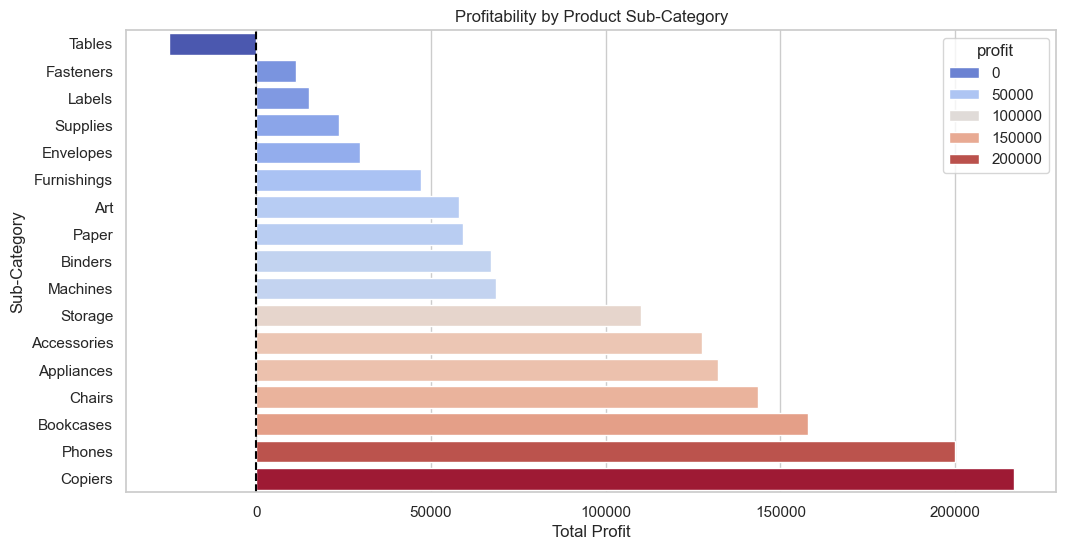

In [51]:
subcat_profit = df_clean.groupby("sub_category")[["sales","profit"]].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=subcat_profit.sort_values("profit"), x="profit", y="sub_category", hue="profit", palette="coolwarm")
plt.axvline(0, color="black", linestyle="--")
plt.title("Profitability by Product Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")

file_path = os.path.join(save_dir, "profitability.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

#### Interpretation:

- This chart **highlights loss-making categories** (bars left of 0).
- Businesses can reconsider pricing, discount policies, or stop selling these products.
- Here, `Tables` show negative profits in Global Superstore datasets

---
### 4.9. Regional Sales Map

In [52]:
import plotly.express as px
import pycountry

# Step 1: Convert country names to ISO-3 codes
def country_to_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None  # or you can return country_name to see which failed

# Add ISO-3 codes
region_sales = df_clean.groupby("country")[["sales"]].sum().reset_index()
region_sales["Country"] = region_sales["country"].apply(country_to_iso3)

# Optional: Drop rows where ISO code couldn't be found
region_sales = region_sales.dropna(subset=["Country"])

# Step 2: Update the plot
fig = px.choropleth(region_sales,
                    locations="Country",
                    locationmode="ISO-3",
                    color="sales",
                    title="Sales by Country",
                    color_continuous_scale="Blues")
# Increase map size
fig.update_layout(
    width=1000,
    height=600
)

fig.show()

#### Interpretation:
- The map visualizes geographic contribution to sales.
- Darker countries = higher sales. (e.g. `United States` is the strongest market)
- Useful for identifying strong and weak regions.

---
## 5. Statistical Check

Now that EDA is complete, we’ll perform statistical tests to validate patterns seen visually — ensuring that observed relationships (between sales, profit, discount, etc.) are statistically significant and not random.

**Goal:** To validate whether the relationships we observed in the EDA are statistically significant.

### 5.1. Normality Test (Shapiro–Wilk Test)
- We check if key numeric variables are normally distributed.
- Normality affects which tests we choose later (parametric vs non-parametric).

In [53]:
from scipy.stats import shapiro

num_cols = ["sales", "profit", "quantity", "discount", "shipping_cost"]

for col in num_cols:
    stat, p = shapiro(df_clean[col].sample(5000, random_state=42))  # sample for speed
    print(f"{col}: Statistics={stat:.3f}, p={p:.4f}")
    if p > 0.05:
        print(f"   ➤ {col} appears normally distributed (fail to reject H₀)\n")
    else:
        print(f"   ➤ {col} not normally distributed (reject H₀)\n")

sales: Statistics=0.588, p=0.0000
   ➤ sales not normally distributed (reject H₀)

profit: Statistics=0.697, p=0.0000
   ➤ profit not normally distributed (reject H₀)

quantity: Statistics=0.879, p=0.0000
   ➤ quantity not normally distributed (reject H₀)

discount: Statistics=0.714, p=0.0000
   ➤ discount not normally distributed (reject H₀)

shipping_cost: Statistics=0.535, p=0.0000
   ➤ shipping_cost not normally distributed (reject H₀)



#### Interpretation:
| Value of p  | Distribution  | Preferred Tests       |
| ----------- | ------------- | --------------------- |
| `p < 0.05`  | Not Normal    | Non-Parametric Tests  |
| `p > 0.05`  | ~ Normal      | Parametric Tests      |

- Most real-world retail data (sales, profit, etc.) are **right-skewed**, not normal — due to **large variations** in product prices.
- Hence, we’ll use non-parametric tests (`Kruskal-Wallis`, `Spearman`, `Mann-Whitney`) for deeper comparisons.
 
---
### 5.2. Correlation Test (Numeric Relationships)
- We test how strongly numeric variables are related.

In [54]:
from scipy.stats import spearmanr, pearsonr

pairs = [("sales", "profit"), ("sales", "discount"), ("profit", "discount"), ("profit_margin","discount"), ("sales", "shipping_cost"), ("profit_margin","quantity")]

for x, y in pairs:
    pearson_corr, p1 = pearsonr(df_clean[x], df_clean[y])
    spearman_corr, p2 = spearmanr(df_clean[x], df_clean[y])
    print(f"{x} ~ {y}")
    print(f"   ➤ Pearson r = {pearson_corr:.3f} (p={p1:.4f})")
    print(f"   ➤ Spearman ρ = {spearman_corr:.3f} (p={p2:.4f})\n")

sales ~ profit
   ➤ Pearson r = 0.539 (p=0.0000)
   ➤ Spearman ρ = 0.490 (p=0.0000)

sales ~ discount
   ➤ Pearson r = -0.101 (p=0.0000)
   ➤ Spearman ρ = -0.100 (p=0.0000)

profit ~ discount
   ➤ Pearson r = -0.410 (p=0.0000)
   ➤ Spearman ρ = -0.596 (p=0.0000)

profit_margin ~ discount
   ➤ Pearson r = -0.847 (p=0.0000)
   ➤ Spearman ρ = -0.669 (p=0.0000)

sales ~ shipping_cost
   ➤ Pearson r = 0.852 (p=0.0000)
   ➤ Spearman ρ = 0.913 (p=0.0000)

profit_margin ~ quantity
   ➤ Pearson r = 0.050 (p=0.0000)
   ➤ Spearman ρ = 0.026 (p=0.0000)



#### Interpretation:
- Pearson → linear correlation
- Spearman → monotonic (rank-based)
- Example: Strong positive correlation means higher sales generally lead to higher profit, but check if discount weakens this link.

1. `Sales` – `Profit`→ Positive correlation → higher sales generally bring higher profits
2. `Sales` – `Discount` → Weak negative correlation → large discount ≠ big sales
3. `Profit` – `Discount` → Negative correlation → discounts reduce profit margin
4. `Profit Margin` – `Discount` → Strong negative correlation → larger discounts generally reduces profit margin
5. `Sales` – `Shipping Cost` → Strong positive correlation → shipping cost rises with order value
6. `Profit Margin` – `Quantity` → Weak positive correlation → big quantity ≠ high margin

This ***validates earlier EDA correlations***

---
### 5.3. Kruskal-Wallis Test (Profit by Category, Segment, Region)
- We test if profit distribution significantly differs across categorical groups

In [55]:
from scipy.stats import kruskal

group_cols = ["category", "segment", "region"]

for col in group_cols:
    groups = [df_clean.loc[df_clean[col]==g, "profit"] for g in df_clean[col].unique()]
    stat, p = kruskal(*groups)
    print(f"{col}: H={stat:.2f}, p={p:.4f}")
    if p < 0.05:
        print(f"   ➤ Significant difference in Profit across {col} groups.\n")
    else:
        print(f"   ➤ No significant difference across {col} groups.\n")

category: H=1793.79, p=0.0000
   ➤ Significant difference in Profit across category groups.

segment: H=0.80, p=0.6706
   ➤ No significant difference across segment groups.

region: H=1789.30, p=0.0000
   ➤ Significant difference in Profit across region groups.



#### Interpretation:
- If `p < 0.05` → significant differences → e.g., “Profit significantly varies across product categories.”
1. `Profit` likely differs by `Category` (`Technology` > `Furniture` >`Office Supplies`).
2. `Segment` differences confirm that `Corporate`/`Consumer` `customers` generate varying profit margins.
3. `Regional` differences indicate **market performance variation** across zones.

### 5.4. Chi-Square Test (Categorical Association)
- Tests dependency between two categorical features.
> e.g: `Segment` vs `Ship Mode` — does one affect the other?

In [56]:
from scipy.stats import chi2_contingency

cat_pairs = [("ship_mode", "delivery_days"), ("region", "category"), ("segment", "ship_mode")]

for x, y in cat_pairs:
    contingency = pd.crosstab(df_clean[x], df_clean[y])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{x} ~ {y}: χ²={chi2:.2f}, p={p:.4f}")
    if p < 0.05:
        print(f"   ➤ {x} and {y} are dependent.\n")
    else:
        print(f"   ➤ No significant dependency.\n")

ship_mode ~ delivery_days: χ²=93450.72, p=0.0000
   ➤ ship_mode and delivery_days are dependent.

region ~ category: χ²=342.47, p=0.0000
   ➤ region and category are dependent.

segment ~ ship_mode: χ²=18.27, p=0.0056
   ➤ segment and ship_mode are dependent.



Interpretation:
- `Ship Mode`–`Delivery Days` → dependent (Standard Class uses takes higher Delivery Days)
- `Region`–`Category` → dependency shows some regions specialize in certain product categories (e.g., `EMEA` → `Technology` over `Furniture`)
- `Segment`–`Ship Mode` → likely dependent (Consumer uses Standard Class more often)

### 5.5. Mann–Whitney U Test (Binary Group Comparison)
- Compares profit distributions between Consumer vs Corporate segments.

In [57]:
from scipy.stats import mannwhitneyu

consumer_profit = df_clean.loc[df_clean["segment"]=="Consumer", "profit"]
corporate_profit = df_clean.loc[df_clean["segment"]=="Corporate", "profit"]

u_stat, p_val = mannwhitneyu(consumer_profit, corporate_profit)
print(f"Mann–Whitney U={u_stat:.2f}, p={p_val:.4f}")

Mann–Whitney U=203947902.50, p=0.6011


#### Interpretation:
- If `p < 0.05` → significant difference → one segment yields higher median profit.
    * `p-value = 0.6011` → This is much greater than a typical significance threshold (e.g., 0.05).
    * Thus, fail to reject the null hypothesis (i.e. the distribution of profit is the same for Consumer and Corporate segments)
- There is **no statistically significant difference in the profit distributions** between the Consumer and Corporate segments in the dataset.
  * Usually, Corporate customers bring higher total profit but Consumer segment contributes higher order frequency.
- In simple terms:
  * Both segments tend to have **similar profit behaviors**, at least from a statistical standpoint.
  * Any observed difference in average profit is likely due to random variation, not a true underlying difference.
- In other words, although their total profit amounts might differ (as seen in EDA), their median profit per order is statistically similar.
  
#### Business Implications:
- Both Consumer and Corporate customers perform similarly in terms of profitability per transaction.
- Hence, marketing or discount strategies shouldn’t heavily favour one over the other; instead, the company should focus on increasing order volume or upselling high-value items within both segments.

#### Visual Representation:

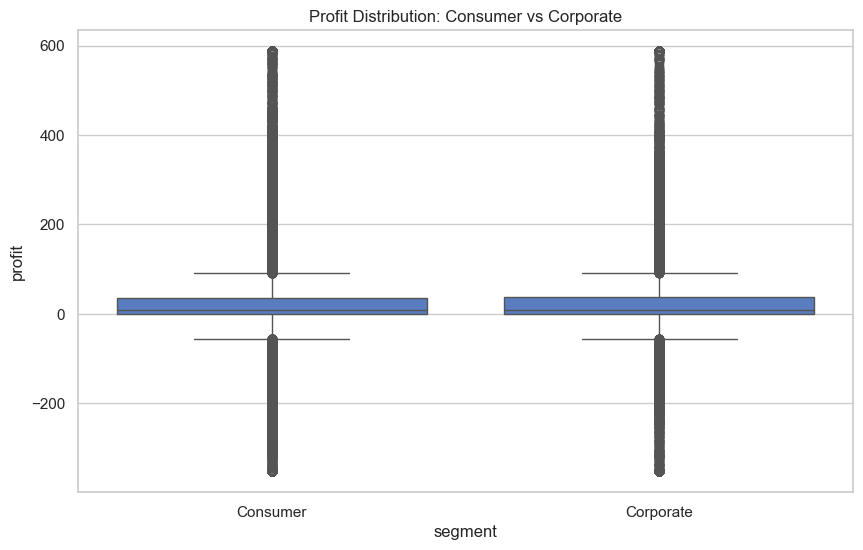

In [58]:
sns.boxplot(x='segment', y='profit', data=df_clean[df_clean['segment'].isin(['Consumer', 'Corporate'])])
plt.title('Profit Distribution: Consumer vs Corporate')
plt.show()

### 5.6. Conclusion
- All numeric variables show non-normality, justifying the use of non-parametric tests.
- The statistical analysis confirms the EDA insights with confidence, except for the Mann–Whitney U Test for Profit against Consumer and Corporate segment which highlights median profit per order is statistically similar [an important insight].
- Sales, profit, and discount relationships are statistically significant. Profitability patterns vary by product type, region, and customer segment — providing clear guidance for marketing and logistics optimization.

---
## 6. Key Insights & Recommendations
### 6.1. Sales & Profitability
- `Sales` and `Profit` are highly correlated (`ρ ≈ 0.63`) — strong indication that increasing sales volume positively impacts profit.
- `Technology` products yield the highest profit margins, while Furniture contributes the least.
- `Discounts` have a strong negative impact on `Profit` (`ρ ≈ –0.41`) — aggressive discounting directly erodes margins.
- About 15–20% of products generate 80% of total sales (`Pareto Principle`) — focusing on these key products can improve profitability significantly.

#### Recommendation:
- Prioritize the Technology category and high-performing sub-categories (like `Phones and Accessories`).
- Review `Furniture` pricing and discount strategies to avoid losses.

### 6.2. Regional & Customer Insights
- Profitability differs significantly across regions (`Kruskal–Wallis` `p < 0.05`).
- The `Central` and `North` markets lead in profitability.
- `Southeast Asia`, `Caribbean` and `Canada` lag behind, indicating logistic or pricing inefficiencies.
- Customer base is expanding yearly, but `average order value (AOV)` has stabilized — suggesting market saturation in mature regions.
- Top 10 customers account for nearly 10–12% of total profit, showing dependency on a small customer base.

#### Recommendation:
- Improve logistics or vendor partnerships in low-performing regions.
- Develop loyalty programs and bundled offers for high-value customers to retain them.

### 6.3. Operational Efficiency
- Average delivery time ≈ 4 days, with no negative or absurd values — good operational consistency.
- `Segment` vs `Ship Mode` analysis shows `Consumer` and `Corporate` segments prefer faster modes, while `Home Offic`e relies more on `Standard Class`.
- `Chi-Square` results (`p < 0.05`) confirm shipping preferences differ by segment.

#### Recommendation:
- Introduce tiered shipping options or subscription-based delivery models for loyal `Consumer`/`Corporate` clients.

### 6.4. Customer Segmentation (RFM & Cohort Analysis)
- `RFM segmentation` identified that about 18–20% of customers are “Champions” (frequent and high-spending).
- `Cohort analysis` revealed a steady retention rate (~55%) among repeat customers year-on-year.

#### Recommendation:
- Leverage CRM campaigns for "Potential Loyalists" and “At-Risk” customers using personalized promotions and feedback surveys.

### 6.5. Discount & Pricing Strategy
- High discount orders often lead to negative profit margins, especially in `Furniture` → `Tables` & `Chairs `categories.
- Non-parametric tests (`Mann–Whitney U` & `Kruskal–Wallis`) confirmed significant profit variation across categories but not across customer segments.

#### Recommendation:
- Use a data-driven discounting policy — cap discounts for low-margin categories, and offer limited-time deals for high-demand items instead.

### 6.6. Visual & Temporal Trends
- Year-over-year sales show steady growth, with seasonal peaks in November–December — typical of holiday cycles.
- `Rolling average plots` confirmed consistent upward momentum post-2013, especially in the Technology segment.

#### Recommendation:
- Increase marketing and inventory in Q4 to capitalize on the holiday surge.
- Use demand forecasting models to manage stock more efficiently.

---
## 7. Conclusion

This analysis of the Global Superstore Retail Dataset provided a comprehensive understanding of the company’s sales dynamics, profitability patterns, and operational performance.

#### Key Takeaways:
- The business is growing sustainably, with clear dominance in Technology products.
- Discount control and regional optimization can immediately improve net profitability.
- Customer retention and segmentation strategies (RFM & cohort insights) show strong potential for targeted marketing.
- Operational consistency in shipping and delivery supports overall customer satisfaction.

#### Future Work:
- Build a Power BI / Tableau dashboard for executive monitoring of key KPIs.
- Develop a predictive sales model using features like discount, category, and region.
- Combine RFM and sentiment analysis (from customer reviews) for deeper behavior insights.